In [1]:
cd ../dataprocessing

/Users/carverforbes/internships/google/gunshot-detection/activity-recognition/location/lbs/activity/audioset/dataprocessing


In [124]:
# import statements
import audio_processing as ap

import functools
import os
import sys
from absl import logging

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow import feature_column
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import sklearn

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
# tf.keras.backend.set_floatx('float32')

print("Ran the import statements.")

Ran the import statements.


In [3]:
debug = False
logging.set_verbosity(logging.INFO)

In [114]:
src_dir = 'example_src_dir'
dest_dir = 'example_dest_dir'
# filenames should adhere to the following order
# [dataset, validation set, test set]
filenames = ['test_set2']
filename = 'test_set2'
labels = ['Gunshot, gunfire']
features_to_extract = ['rms']

In [115]:
def get_dataframes():
    length = len(filenames)
    if length == 3:
        dataset_df = ap.output_df(src_dir, dest_dir, filenames[0], labels, features_to_extract)
        evaluation_df = ap.output_df(src_dir, dest_dir, filenames[1], labels, features_to_extract)
        validation_df = ap.output_df(src_dir, dest_dir, filenames[2], labels, features_to_extract)
        dfs = [dataset_df, evaluation_df, validation_df]
    elif length == 2:
        dataset_df = ap.output_df(src_dir, dest_dir, filenames[0], labels, features_to_extract)
        evaluation_df = ap.output_df(src_dir, dest_dir, filenames[1], labels, features_to_extract)
        dfs = [dataset_df, evaluation_df]
    elif length == 1:
        dataset_df = ap.output_df(src_dir, dest_dir, filenames[0], labels, features_to_extract)
        dfs = [dataset_df]
    else:
        raise ValueError('You must have at least one dataset csv and testing data csv')
    return dfs

In [116]:
dfs = get_dataframes()
dfs[0].head()

INFO:absl:The set has 13420 examples
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:a

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:extracted features
INFO:absl:(60, 41.874688)
INFO:absl:extracted features
INFO:absl:(61, 42.386335)
INFO:absl:extracted features
INFO:absl:(62, 42.86654)
INFO:absl:extracted features
INFO:absl:(63, 43.368052)
INFO:absl:extracted features
INFO:absl:(64, 43.859797)
INFO:absl:extracted features
INFO:absl:(65, 44.357394)
INFO:absl:extracted features
INFO:absl:(66, 44.861521)
INFO:absl:extracted features
INFO:absl:(67, 45.365358)
INFO:absl:extracted features
INFO:absl:(68, 45.868726)
INFO:absl:extracted features
INFO:absl:(69, 46.197383)
INFO:absl:extracted features
INFO:absl:(70, 46.706224)
INFO:absl:extracted features
INFO:absl:(71, 47.213459)
INFO:absl:extracted features
INFO:absl:(72, 47.716965)
INFO:absl:extracted features
INFO:absl:(73, 48.219384)
INFO:absl:extracted features
INFO:absl:(74, 48.698896)
INFO:absl:extracted features
INFO:absl:(75, 49.202694)
INFO:absl:extracted features
INFO:absl:(76, 49.676261)
INFO:absl:extracted features
INFO:absl:(77, 50.157508)
INFO:absl:e

INFO:absl:(206, 112.556064)
INFO:absl:extracted features
INFO:absl:(207, 113.027235)
INFO:absl:extracted features
INFO:absl:(208, 113.513645)
INFO:absl:extracted features
INFO:absl:(209, 114.015202)
INFO:absl:extracted features
INFO:absl:(210, 114.522235)
INFO:absl:extracted features
INFO:absl:(211, 115.027518)
INFO:absl:extracted features
INFO:absl:(212, 115.499453)
INFO:absl:extracted features
INFO:absl:(213, 116.00157)
INFO:absl:extracted features
INFO:absl:(214, 116.484679)
INFO:absl:extracted features
INFO:absl:(215, 116.990211)
INFO:absl:extracted features
INFO:absl:(216, 117.472595)
INFO:absl:extracted features
INFO:absl:(217, 117.949551)
INFO:absl:extracted features
INFO:absl:(218, 118.4281)
INFO:absl:extracted features
INFO:absl:(219, 118.933558)
INFO:absl:extracted features
INFO:absl:(220, 119.427117)
INFO:absl:extracted features
INFO:absl:(221, 119.91741)
INFO:absl:extracted features
INFO:absl:(222, 120.39525)
INFO:absl:extracted features
INFO:absl:(223, 120.895793)
INFO:abs

KeyboardInterrupt: 

In [27]:
dataset_df2 = ap.output_csv(src_dir, dest_dir, filename, labels, features_to_extract, redo=False)
dataset_df2.head()

INFO:absl:The set has 13420 examples
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:a

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:extracted features
INFO:absl:(7, 18.244667)
INFO:absl:extracted features
INFO:absl:(8, 18.779644)
INFO:absl:extracted features
INFO:absl:(9, 19.276735)
INFO:absl:extracted features
INFO:absl:(10, 19.790219)
INFO:absl:extracted features
INFO:absl:(11, 20.307271)
INFO:absl:extracted features
INFO:absl:(12, 20.83484)
INFO:absl:extracted features
INFO:absl:(13, 21.379083)
INFO:absl:extracted features
INFO:absl:(14, 21.89414)
INFO:absl:extracted features
INFO:absl:(15, 22.397388)
INFO:absl:extracted features
INFO:absl:(16, 22.919699)
INFO:absl:extracted features
INFO:absl:(17, 23.438545)
INFO:absl:extracted features
INFO:absl:(18, 23.929397)
INFO:absl:extracted features
INFO:absl:(19, 24.448961)
INFO:absl:extracted features
INFO:absl:(20, 24.942867)
INFO:absl:extracted features
INFO:absl:(21, 25.457272)
INFO:absl:extracted features
INFO:absl:(22, 25.957614)
INFO:absl:extracted features
INFO:absl:(23, 26.452337)
INFO:absl:extracted features
INFO:absl:(24, 26.976155)
INFO:absl:extra

INFO:absl:(154, 94.046256)
INFO:absl:extracted features
INFO:absl:(155, 94.538205)
INFO:absl:extracted features
INFO:absl:(156, 95.059801)
INFO:absl:extracted features
INFO:absl:(157, 95.56379)
INFO:absl:extracted features
INFO:absl:(158, 96.096297)
INFO:absl:extracted features
INFO:absl:(159, 96.614552)
INFO:absl:extracted features
INFO:absl:(160, 97.134756)
INFO:absl:extracted features
INFO:absl:(161, 97.664898)
INFO:absl:extracted features
INFO:absl:(162, 98.171985)
INFO:absl:extracted features
INFO:absl:(163, 98.698568)
INFO:absl:extracted features
INFO:absl:(164, 99.228128)
INFO:absl:extracted features
INFO:absl:(165, 99.748427)
INFO:absl:extracted features
INFO:absl:(166, 100.297983)
INFO:absl:extracted features
INFO:absl:(167, 100.823446)
INFO:absl:extracted features
INFO:absl:(168, 101.309844)
INFO:absl:extracted features
INFO:absl:(169, 101.843088)
INFO:absl:extracted features
INFO:absl:(170, 102.36411)
INFO:absl:extracted features
INFO:absl:(171, 102.894022)
INFO:absl:extract

INFO:absl:extracted features
INFO:absl:(299, 168.756385)
INFO:absl:extracted features
INFO:absl:(300, 169.292226)
INFO:absl:extracted features
INFO:absl:(301, 169.821122)
INFO:absl:extracted features
INFO:absl:(302, 170.402736)
INFO:absl:extracted features
INFO:absl:(303, 171.013135)
INFO:absl:extracted features
INFO:absl:(304, 171.521321)
INFO:absl:extracted features
INFO:absl:(305, 172.060089)
INFO:absl:extracted features
INFO:absl:(306, 172.602267)
INFO:absl:extracted features
INFO:absl:(307, 173.154102)
INFO:absl:extracted features
INFO:absl:(308, 173.701141)
INFO:absl:extracted features
INFO:absl:(309, 174.217495)
INFO:absl:extracted features
INFO:absl:(310, 174.710752)
INFO:absl:extracted features
INFO:absl:(311, 175.238639)
INFO:absl:extracted features
INFO:absl:(312, 175.764455)
INFO:absl:extracted features
INFO:absl:(313, 176.333654)
INFO:absl:extracted features
INFO:absl:(314, 176.888198)
INFO:absl:extracted features
INFO:absl:(315, 177.508919)
INFO:absl:extracted features
IN

INFO:absl:extracted features
INFO:absl:(443, 245.759891)
INFO:absl:extracted features
INFO:absl:(444, 246.286202)
INFO:absl:extracted features
INFO:absl:(445, 246.811715)
INFO:absl:extracted features
INFO:absl:(446, 247.325409)
INFO:absl:extracted features
INFO:absl:(447, 247.845579)
INFO:absl:extracted features
INFO:absl:(448, 248.332479)
INFO:absl:extracted features
INFO:absl:(449, 248.845243)
INFO:absl:extracted features
INFO:absl:(450, 249.365121)
INFO:absl:extracted features
INFO:absl:(451, 249.923427)
INFO:absl:extracted features
INFO:absl:(452, 250.43889)
INFO:absl:extracted features
INFO:absl:(453, 250.955517)
INFO:absl:extracted features
INFO:absl:(454, 251.526018)
INFO:absl:extracted features
INFO:absl:(455, 252.085555)
INFO:absl:extracted features
INFO:absl:(456, 252.654458)
INFO:absl:extracted features
INFO:absl:(457, 253.257066)
INFO:absl:extracted features
INFO:absl:(458, 253.865312)
INFO:absl:extracted features
INFO:absl:(459, 254.405648)
INFO:absl:extracted features
INF

INFO:absl:extracted features
INFO:absl:(587, 321.100835)
INFO:absl:extracted features
INFO:absl:(588, 321.625641)
INFO:absl:extracted features
INFO:absl:(589, 322.10779)
INFO:absl:extracted features
INFO:absl:(590, 322.632648)
INFO:absl:extracted features
INFO:absl:(591, 323.156952)
INFO:absl:extracted features
INFO:absl:(592, 323.681908)
INFO:absl:extracted features
INFO:absl:(593, 324.208856)
INFO:absl:extracted features
INFO:absl:(594, 324.729992)
INFO:absl:extracted features
INFO:absl:(595, 325.231817)
INFO:absl:extracted features
INFO:absl:(596, 325.738352)
INFO:absl:extracted features
INFO:absl:(597, 326.282755)
INFO:absl:extracted features
INFO:absl:(598, 326.802208)
INFO:absl:extracted features
INFO:absl:(599, 327.29636)
INFO:absl:extracted features
INFO:absl:(600, 327.828203)
INFO:absl:extracted features
INFO:absl:(601, 328.350619)
INFO:absl:extracted features
INFO:absl:(602, 328.839703)
INFO:absl:extracted features
INFO:absl:(603, 329.348298)
INFO:absl:extracted features
INFO

INFO:absl:(731, 394.732719)
INFO:absl:extracted features
INFO:absl:(732, 395.271778)
INFO:absl:extracted features
INFO:absl:(733, 395.801857)
INFO:absl:extracted features
INFO:absl:(734, 396.347795)
INFO:absl:extracted features
INFO:absl:(735, 396.913015)
INFO:absl:extracted features
INFO:absl:(736, 397.425526)
INFO:absl:extracted features
INFO:absl:(737, 397.946207)
INFO:absl:extracted features
INFO:absl:(738, 398.43031)
INFO:absl:extracted features
INFO:absl:(739, 398.6963)
INFO:absl:extracted features
INFO:absl:(740, 399.214738)
INFO:absl:extracted features
INFO:absl:(741, 399.730492)
INFO:absl:extracted features
INFO:absl:(742, 400.217958)
INFO:absl:extracted features
INFO:absl:(743, 400.744972)
INFO:absl:extracted features
INFO:absl:(744, 401.264231)
INFO:absl:extracted features
INFO:absl:(745, 401.747206)
INFO:absl:extracted features
INFO:absl:(746, 402.258445)
INFO:absl:extracted features
INFO:absl:(747, 402.778423)
INFO:absl:extracted features
INFO:absl:(748, 403.326187)
INFO:a

INFO:absl:extracted features
INFO:absl:(876, 469.092888)
INFO:absl:extracted features
INFO:absl:(877, 469.578778)
INFO:absl:extracted features
INFO:absl:(878, 470.099381)
INFO:absl:extracted features
INFO:absl:(879, 470.594951)
INFO:absl:extracted features
INFO:absl:(880, 471.110718)
INFO:absl:extracted features
INFO:absl:(881, 471.653196)
INFO:absl:extracted features
INFO:absl:(882, 472.164126)
INFO:absl:extracted features
INFO:absl:(883, 472.686394)
INFO:absl:extracted features
INFO:absl:(884, 473.203114)
INFO:absl:extracted features
INFO:absl:(885, 473.723494)
INFO:absl:extracted features
INFO:absl:(886, 474.226615)
INFO:absl:extracted features
INFO:absl:(887, 474.749562)
INFO:absl:extracted features
INFO:absl:(888, 475.304675)
INFO:absl:extracted features
INFO:absl:(889, 475.814936)
INFO:absl:extracted features
INFO:absl:(890, 476.327786)
INFO:absl:extracted features
INFO:absl:(891, 476.819791)
INFO:absl:extracted features
INFO:absl:(892, 477.326178)
INFO:absl:extracted features
IN

INFO:absl:extracted features
INFO:absl:(1019, 541.429313)
INFO:absl:extracted features
INFO:absl:(1020, 541.954081)
INFO:absl:extracted features
INFO:absl:(1021, 542.463609)
INFO:absl:extracted features
INFO:absl:(1022, 542.980995)
INFO:absl:extracted features
INFO:absl:(1023, 543.508031)
INFO:absl:extracted features
INFO:absl:(1024, 544.016555)
INFO:absl:extracted features
INFO:absl:(1025, 544.536276)
INFO:absl:extracted features
INFO:absl:(1026, 545.047516)
INFO:absl:extracted features
INFO:absl:(1027, 545.561727)
INFO:absl:extracted features
INFO:absl:(1028, 546.097669)
INFO:absl:extracted features
INFO:absl:(1029, 546.626684)
INFO:absl:extracted features
INFO:absl:(1030, 547.197724)
INFO:absl:extracted features
INFO:absl:(1031, 547.755097)
INFO:absl:extracted features
INFO:absl:(1032, 548.309616)
INFO:absl:extracted features
INFO:absl:(1033, 548.837032)
INFO:absl:extracted features
INFO:absl:(1034, 549.362684)
INFO:absl:extracted features
INFO:absl:(1035, 549.864418)
INFO:absl:extr

INFO:absl:(1160, 613.983698)
INFO:absl:extracted features
INFO:absl:(1161, 614.485729)
INFO:absl:extracted features
INFO:absl:(1162, 615.011724)
INFO:absl:extracted features
INFO:absl:(1163, 615.549494)
INFO:absl:extracted features
INFO:absl:(1164, 616.080802)
INFO:absl:extracted features
INFO:absl:(1165, 616.639519)
INFO:absl:extracted features
INFO:absl:(1166, 617.196161)
INFO:absl:extracted features
INFO:absl:(1167, 617.767504)
INFO:absl:extracted features
INFO:absl:(1168, 618.321477)
INFO:absl:extracted features
INFO:absl:(1169, 618.862337)
INFO:absl:extracted features
INFO:absl:(1170, 619.373847)
INFO:absl:extracted features
INFO:absl:(1171, 619.900349)
INFO:absl:extracted features
INFO:absl:(1172, 620.423427)
INFO:absl:extracted features
INFO:absl:(1173, 620.948877)
INFO:absl:extracted features
INFO:absl:(1174, 621.46528)
INFO:absl:extracted features
INFO:absl:(1175, 621.982584)
INFO:absl:extracted features
INFO:absl:(1176, 622.501278)
INFO:absl:extracted features
INFO:absl:(1177

INFO:absl:extracted features
INFO:absl:(1302, 689.125267)
INFO:absl:extracted features
INFO:absl:(1303, 689.680324)
INFO:absl:extracted features
INFO:absl:(1304, 690.215442)
INFO:absl:extracted features
INFO:absl:(1305, 690.75947)
INFO:absl:extracted features
INFO:absl:(1306, 691.315162)
INFO:absl:extracted features
INFO:absl:(1307, 691.860152)
INFO:absl:extracted features
INFO:absl:(1308, 692.381113)
INFO:absl:extracted features
INFO:absl:(1309, 692.941953)
INFO:absl:extracted features
INFO:absl:(1310, 693.499221)
INFO:absl:extracted features
INFO:absl:(1311, 694.05313)
INFO:absl:extracted features
INFO:absl:(1312, 694.555126)
INFO:absl:extracted features
INFO:absl:(1313, 695.10421)
INFO:absl:extracted features
INFO:absl:(1314, 695.667571)
INFO:absl:extracted features
INFO:absl:(1315, 696.157464)
INFO:absl:extracted features
INFO:absl:(1316, 696.675349)
INFO:absl:extracted features
INFO:absl:(1317, 697.195772)
INFO:absl:extracted features
INFO:absl:(1318, 697.708984)
INFO:absl:extract

INFO:absl:extracted features
INFO:absl:(1444, 763.883255)
INFO:absl:extracted features
INFO:absl:(1445, 764.440348)
INFO:absl:extracted features
INFO:absl:(1446, 765.003967)
INFO:absl:extracted features
INFO:absl:(1447, 765.517454)
INFO:absl:extracted features
INFO:absl:(1448, 766.084633)
INFO:absl:extracted features
INFO:absl:(1449, 766.654117)
INFO:absl:extracted features
INFO:absl:(1450, 767.230849)
INFO:absl:extracted features
INFO:absl:(1451, 767.781206)
INFO:absl:extracted features
INFO:absl:(1452, 768.273881)
INFO:absl:extracted features
INFO:absl:(1453, 768.793481)
INFO:absl:extracted features
INFO:absl:(1454, 769.349493)
INFO:absl:extracted features
INFO:absl:(1455, 769.877984)
INFO:absl:extracted features
INFO:absl:(1456, 770.406122)
INFO:absl:extracted features
INFO:absl:(1457, 770.933084)
INFO:absl:extracted features
INFO:absl:(1458, 771.423244)
INFO:absl:extracted features
INFO:absl:(1459, 771.949507)
INFO:absl:extracted features
INFO:absl:(1460, 772.423537)
INFO:absl:extr

INFO:absl:(1585, 838.499768)
INFO:absl:extracted features
INFO:absl:(1586, 839.036687)
INFO:absl:extracted features
INFO:absl:(1587, 839.574691)
INFO:absl:extracted features
INFO:absl:(1588, 840.115271)
INFO:absl:extracted features
INFO:absl:(1589, 840.640098)
INFO:absl:extracted features
INFO:absl:(1590, 841.163814)
INFO:absl:extracted features
INFO:absl:(1591, 841.68462)
INFO:absl:extracted features
INFO:absl:(1592, 842.205908)
INFO:absl:extracted features
INFO:absl:(1593, 842.697473)
INFO:absl:extracted features
INFO:absl:(1594, 843.229062)
INFO:absl:extracted features
INFO:absl:(1595, 843.749115)
INFO:absl:extracted features
INFO:absl:(1596, 844.290125)
INFO:absl:extracted features
INFO:absl:(1597, 844.807075)
INFO:absl:extracted features
INFO:absl:(1598, 845.297225)
INFO:absl:extracted features
INFO:absl:(1599, 845.866103)
INFO:absl:extracted features
INFO:absl:(1600, 846.400634)
INFO:absl:extracted features
INFO:absl:(1601, 846.941855)
INFO:absl:extracted features
INFO:absl:(1602

INFO:absl:(1727, 911.465099)
INFO:absl:extracted features
INFO:absl:(1728, 911.984738)
INFO:absl:extracted features
INFO:absl:(1729, 912.486171)
INFO:absl:extracted features
INFO:absl:(1730, 913.079307)
INFO:absl:extracted features
INFO:absl:(1731, 913.650245)
INFO:absl:extracted features
INFO:absl:(1732, 914.184588)
INFO:absl:extracted features
INFO:absl:(1733, 914.773387)
INFO:absl:extracted features
INFO:absl:(1734, 915.326587)
INFO:absl:extracted features
INFO:absl:(1735, 915.823255)
INFO:absl:extracted features
INFO:absl:(1736, 916.332167)
INFO:absl:extracted features
INFO:absl:(1737, 916.88157)
INFO:absl:extracted features
INFO:absl:(1738, 917.402022)
INFO:absl:extracted features
INFO:absl:(1739, 917.884755)
INFO:absl:extracted features
INFO:absl:(1740, 918.393039)
INFO:absl:extracted features
INFO:absl:(1741, 918.868854)
INFO:absl:extracted features
INFO:absl:(1742, 919.389556)
INFO:absl:extracted features
INFO:absl:(1743, 919.888989)
INFO:absl:extracted features
INFO:absl:(1744

INFO:absl:(1869, 984.966127)
INFO:absl:extracted features
INFO:absl:(1870, 985.486836)
INFO:absl:extracted features
INFO:absl:(1871, 985.992061)
INFO:absl:extracted features
INFO:absl:(1872, 986.541387)
INFO:absl:extracted features
INFO:absl:(1873, 987.058459)
INFO:absl:extracted features
INFO:absl:(1874, 987.585945)
INFO:absl:extracted features
INFO:absl:(1875, 988.108882)
INFO:absl:extracted features
INFO:absl:(1876, 988.608878)
INFO:absl:extracted features
INFO:absl:(1877, 989.139094)
INFO:absl:extracted features
INFO:absl:(1878, 989.669)
INFO:absl:extracted features
INFO:absl:(1879, 990.198172)
INFO:absl:extracted features
INFO:absl:(1880, 990.720202)
INFO:absl:extracted features
INFO:absl:(1881, 991.242805)
INFO:absl:extracted features
INFO:absl:(1882, 991.73949)
INFO:absl:extracted features
INFO:absl:(1883, 992.257829)
INFO:absl:extracted features
INFO:absl:(1884, 992.771596)
INFO:absl:extracted features
INFO:absl:(1885, 993.318473)
INFO:absl:extracted features
INFO:absl:(1886, 9

INFO:absl:(2009, 1059.001511)
INFO:absl:extracted features
INFO:absl:(2010, 1059.526988)
INFO:absl:extracted features
INFO:absl:(2011, 1060.056058)
INFO:absl:extracted features
INFO:absl:(2012, 1060.550485)
INFO:absl:extracted features
INFO:absl:(2013, 1061.080936)
INFO:absl:extracted features
INFO:absl:(2014, 1061.637616)
INFO:absl:extracted features
INFO:absl:(2015, 1062.191878)
INFO:absl:extracted features
INFO:absl:(2016, 1062.711459)
INFO:absl:extracted features
INFO:absl:(2017, 1063.23229)
INFO:absl:extracted features
INFO:absl:(2018, 1063.751309)
INFO:absl:extracted features
INFO:absl:(2019, 1064.27768)
INFO:absl:extracted features
INFO:absl:(2020, 1064.773664)
INFO:absl:extracted features
INFO:absl:(2021, 1065.295432)
INFO:absl:extracted features
INFO:absl:(2022, 1065.838908)
INFO:absl:extracted features
INFO:absl:(2023, 1066.334807)
INFO:absl:extracted features
INFO:absl:(2024, 1066.847271)
INFO:absl:extracted features
INFO:absl:(2025, 1067.370953)
INFO:absl:extracted features

INFO:absl:extracted features
INFO:absl:(2149, 1131.687177)
INFO:absl:extracted features
INFO:absl:(2150, 1132.136019)
INFO:absl:extracted features
INFO:absl:(2151, 1132.621791)
INFO:absl:extracted features
INFO:absl:(2152, 1133.136701)
INFO:absl:extracted features
INFO:absl:(2153, 1133.629755)
INFO:absl:extracted features
INFO:absl:(2154, 1134.179072)
INFO:absl:extracted features
INFO:absl:(2155, 1134.697565)
INFO:absl:extracted features
INFO:absl:(2156, 1135.222726)
INFO:absl:extracted features
INFO:absl:(2157, 1135.747429)
INFO:absl:extracted features
INFO:absl:(2158, 1136.207213)
INFO:absl:extracted features
INFO:absl:(2159, 1136.704349)
INFO:absl:extracted features
INFO:absl:(2160, 1137.20057)
INFO:absl:extracted features
INFO:absl:(2161, 1137.701383)
INFO:absl:extracted features
INFO:absl:(2162, 1138.197073)
INFO:absl:extracted features
INFO:absl:(2163, 1138.717735)
INFO:absl:extracted features
INFO:absl:(2164, 1139.240391)
INFO:absl:extracted features
INFO:absl:(2165, 1139.736988

INFO:absl:extracted features
INFO:absl:(2288, 1202.916098)
INFO:absl:extracted features
INFO:absl:(2289, 1203.412475)
INFO:absl:extracted features
INFO:absl:(2290, 1203.927786)
INFO:absl:extracted features
INFO:absl:(2291, 1204.473002)
INFO:absl:extracted features
INFO:absl:(2292, 1204.993334)
INFO:absl:extracted features
INFO:absl:(2293, 1205.517497)
INFO:absl:extracted features
INFO:absl:(2294, 1206.048315)
INFO:absl:extracted features
INFO:absl:(2295, 1206.5731)
INFO:absl:extracted features
INFO:absl:(2296, 1207.109054)
INFO:absl:extracted features
INFO:absl:(2297, 1207.657285)
INFO:absl:extracted features
INFO:absl:(2298, 1208.192844)
INFO:absl:extracted features
INFO:absl:(2299, 1208.731566)
INFO:absl:extracted features
INFO:absl:(2300, 1209.259665)
INFO:absl:extracted features
INFO:absl:(2301, 1209.784419)
INFO:absl:extracted features
INFO:absl:(2302, 1210.29052)
INFO:absl:extracted features
INFO:absl:(2303, 1210.819839)
INFO:absl:extracted features
INFO:absl:(2304, 1211.344651)


INFO:absl:(2426, 1273.656435)
INFO:absl:extracted features
INFO:absl:(2427, 1274.166194)
INFO:absl:extracted features
INFO:absl:(2428, 1274.720041)
INFO:absl:extracted features
INFO:absl:(2429, 1275.239931)
INFO:absl:extracted features
INFO:absl:(2430, 1275.773808)
INFO:absl:extracted features
INFO:absl:(2431, 1276.278567)
INFO:absl:extracted features
INFO:absl:(2432, 1276.805645)
INFO:absl:extracted features
INFO:absl:(2433, 1277.33188)
INFO:absl:extracted features
INFO:absl:(2434, 1277.834266)
INFO:absl:extracted features
INFO:absl:(2435, 1278.298533)
INFO:absl:extracted features
INFO:absl:(2436, 1278.765656)
INFO:absl:extracted features
INFO:absl:(2437, 1279.265374)
INFO:absl:extracted features
INFO:absl:(2438, 1279.788884)
INFO:absl:extracted features
INFO:absl:(2439, 1280.308566)
INFO:absl:extracted features
INFO:absl:(2440, 1280.797032)
INFO:absl:extracted features
INFO:absl:(2441, 1281.330949)
INFO:absl:extracted features
INFO:absl:(2442, 1281.855639)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(2566, 1349.696428)
INFO:absl:extracted features
INFO:absl:(2567, 1350.239881)
INFO:absl:extracted features
INFO:absl:(2568, 1350.717767)
INFO:absl:extracted features
INFO:absl:(2569, 1351.248718)
INFO:absl:extracted features
INFO:absl:(2570, 1351.760872)
INFO:absl:extracted features
INFO:absl:(2571, 1352.282315)
INFO:absl:extracted features
INFO:absl:(2572, 1352.791214)
INFO:absl:extracted features
INFO:absl:(2573, 1353.337345)
INFO:absl:extracted features
INFO:absl:(2574, 1353.866209)
INFO:absl:extracted features
INFO:absl:(2575, 1354.406193)
INFO:absl:extracted features
INFO:absl:(2576, 1354.927189)
INFO:absl:extracted features
INFO:absl:(2577, 1355.496229)
INFO:absl:extracted features
INFO:absl:(2578, 1356.055277)
INFO:absl:extracted features
INFO:absl:(2579, 1356.583692)
INFO:absl:extracted features
INFO:absl:(2580, 1357.146642)
INFO:absl:extracted features
INFO:absl:(2581, 1357.683004)
INFO:absl:extracted features
INFO:absl:(2582, 1358.25010

INFO:absl:(2705, 1425.475912)
INFO:absl:extracted features
INFO:absl:(2706, 1425.972022)
INFO:absl:extracted features
INFO:absl:(2707, 1426.487896)
INFO:absl:extracted features
INFO:absl:(2708, 1427.013587)
INFO:absl:extracted features
INFO:absl:(2709, 1427.547405)
INFO:absl:extracted features
INFO:absl:(2710, 1428.049655)
INFO:absl:extracted features
INFO:absl:(2711, 1428.550811)
INFO:absl:extracted features
INFO:absl:(2712, 1429.074171)
INFO:absl:extracted features
INFO:absl:(2713, 1429.631457)
INFO:absl:extracted features
INFO:absl:(2714, 1430.174925)
INFO:absl:extracted features
INFO:absl:(2715, 1430.742627)
INFO:absl:extracted features
INFO:absl:(2716, 1431.28454)
INFO:absl:extracted features
INFO:absl:(2717, 1431.82573)
INFO:absl:extracted features
INFO:absl:(2718, 1432.331713)
INFO:absl:extracted features
INFO:absl:(2719, 1432.891325)
INFO:absl:extracted features
INFO:absl:(2720, 1433.450633)
INFO:absl:extracted features
INFO:absl:(2721, 1433.970112)
INFO:absl:extracted features

INFO:absl:extracted features
INFO:absl:(2845, 1500.513405)
INFO:absl:extracted features
INFO:absl:(2846, 1501.074246)
INFO:absl:extracted features
INFO:absl:(2847, 1501.606685)
INFO:absl:extracted features
INFO:absl:(2848, 1502.145863)
INFO:absl:extracted features
INFO:absl:(2849, 1502.65113)
INFO:absl:extracted features
INFO:absl:(2850, 1503.158502)
INFO:absl:extracted features
INFO:absl:(2851, 1503.68695)
INFO:absl:extracted features
INFO:absl:(2852, 1504.039857)
INFO:absl:extracted features
INFO:absl:(2853, 1504.553114)
INFO:absl:extracted features
INFO:absl:(2854, 1505.098835)
INFO:absl:extracted features
INFO:absl:(2855, 1505.634425)
INFO:absl:extracted features
INFO:absl:(2856, 1506.177625)
INFO:absl:extracted features
INFO:absl:(2857, 1506.724762)
INFO:absl:extracted features
INFO:absl:(2858, 1507.288594)
INFO:absl:extracted features
INFO:absl:(2859, 1507.836323)
INFO:absl:extracted features
INFO:absl:(2860, 1508.341349)
INFO:absl:extracted features
INFO:absl:(2861, 1508.866372)

INFO:absl:(2984, 1574.904137)
INFO:absl:extracted features
INFO:absl:(2985, 1575.406334)
INFO:absl:extracted features
INFO:absl:(2986, 1575.965743)
INFO:absl:extracted features
INFO:absl:(2987, 1576.506725)
INFO:absl:extracted features
INFO:absl:(2988, 1577.039044)
INFO:absl:extracted features
INFO:absl:(2989, 1577.56741)
INFO:absl:extracted features
INFO:absl:(2990, 1578.096978)
INFO:absl:extracted features
INFO:absl:(2991, 1578.655601)
INFO:absl:extracted features
INFO:absl:(2992, 1579.178126)
INFO:absl:extracted features
INFO:absl:(2993, 1579.705671)
INFO:absl:extracted features
INFO:absl:(2994, 1580.24941)
INFO:absl:extracted features
INFO:absl:(2995, 1580.755725)
INFO:absl:extracted features
INFO:absl:(2996, 1581.296281)
INFO:absl:extracted features
INFO:absl:(2997, 1581.805035)
INFO:absl:extracted features
INFO:absl:(2998, 1582.306506)
INFO:absl:extracted features
INFO:absl:(2999, 1582.820777)
INFO:absl:extracted features
INFO:absl:(3000, 1583.353394)
INFO:absl:extracted features

INFO:absl:extracted features
INFO:absl:(3124, 1649.715054)
INFO:absl:extracted features
INFO:absl:(3125, 1650.121679)
INFO:absl:extracted features
INFO:absl:(3126, 1650.786094)
INFO:absl:extracted features
INFO:absl:(3127, 1651.45193)
INFO:absl:extracted features
INFO:absl:(3128, 1652.106327)
INFO:absl:extracted features
INFO:absl:(3129, 1652.668664)
INFO:absl:extracted features
INFO:absl:(3130, 1653.232101)
INFO:absl:extracted features
INFO:absl:(3131, 1653.869326)
INFO:absl:extracted features
INFO:absl:(3132, 1654.482822)
INFO:absl:extracted features
INFO:absl:(3133, 1654.732462)
INFO:absl:extracted features
INFO:absl:(3134, 1655.276497)
INFO:absl:extracted features
INFO:absl:(3135, 1655.823324)
INFO:absl:extracted features
INFO:absl:(3136, 1656.350501)
INFO:absl:extracted features
INFO:absl:(3137, 1656.877029)
INFO:absl:extracted features
INFO:absl:(3138, 1657.410142)
INFO:absl:extracted features
INFO:absl:(3139, 1657.914868)
INFO:absl:extracted features
INFO:absl:(3140, 1659.145707

INFO:absl:(3263, 1722.519048)
INFO:absl:extracted features
INFO:absl:(3264, 1723.040894)
INFO:absl:extracted features
INFO:absl:(3265, 1723.561014)
INFO:absl:extracted features
INFO:absl:(3266, 1724.098608)
INFO:absl:extracted features
INFO:absl:(3267, 1724.640766)
INFO:absl:extracted features
INFO:absl:(3268, 1725.296282)
INFO:absl:extracted features
INFO:absl:(3269, 1725.955662)
INFO:absl:extracted features
INFO:absl:(3270, 1726.535588)
INFO:absl:extracted features
INFO:absl:(3271, 1727.04805)
INFO:absl:extracted features
INFO:absl:(3272, 1727.432254)
INFO:absl:extracted features
INFO:absl:(3273, 1727.94935)
INFO:absl:extracted features
INFO:absl:(3274, 1728.026383)
INFO:absl:extracted features
INFO:absl:(3275, 1728.528123)
INFO:absl:extracted features
INFO:absl:(3276, 1729.040641)
INFO:absl:extracted features
INFO:absl:(3277, 1729.560968)
INFO:absl:extracted features
INFO:absl:(3278, 1730.085403)
INFO:absl:extracted features
INFO:absl:(3279, 1730.627121)
INFO:absl:extracted features

INFO:absl:extracted features
INFO:absl:(3403, 1796.086876)
INFO:absl:extracted features
INFO:absl:(3404, 1796.599945)
INFO:absl:extracted features
INFO:absl:(3405, 1797.113758)
INFO:absl:extracted features
INFO:absl:(3406, 1797.613519)
INFO:absl:extracted features
INFO:absl:(3407, 1798.07548)
INFO:absl:extracted features
INFO:absl:(3408, 1798.59202)
INFO:absl:extracted features
INFO:absl:(3409, 1799.11453)
INFO:absl:extracted features
INFO:absl:(3410, 1799.626067)
INFO:absl:extracted features
INFO:absl:(3411, 1800.015539)
INFO:absl:extracted features
INFO:absl:(3412, 1800.536831)
INFO:absl:extracted features
INFO:absl:(3413, 1801.044161)
INFO:absl:extracted features
INFO:absl:(3414, 1801.540878)
INFO:absl:extracted features
INFO:absl:(3415, 1802.06189)
INFO:absl:extracted features
INFO:absl:(3416, 1802.604305)
INFO:absl:extracted features
INFO:absl:(3417, 1803.132751)
INFO:absl:extracted features
INFO:absl:(3418, 1803.63248)
INFO:absl:extracted features
INFO:absl:(3419, 1804.153479)
IN

INFO:absl:(3542, 1867.622739)
INFO:absl:extracted features
INFO:absl:(3543, 1868.155282)
INFO:absl:extracted features
INFO:absl:(3544, 1868.685646)
INFO:absl:extracted features
INFO:absl:(3545, 1869.182889)
INFO:absl:extracted features
INFO:absl:(3546, 1869.659108)
INFO:absl:extracted features
INFO:absl:(3547, 1870.161707)
INFO:absl:extracted features
INFO:absl:(3548, 1870.703416)
INFO:absl:extracted features
INFO:absl:(3549, 1871.223786)
INFO:absl:extracted features
INFO:absl:(3550, 1871.742297)
INFO:absl:extracted features
INFO:absl:(3551, 1872.28636)
INFO:absl:extracted features
INFO:absl:(3552, 1872.785807)
INFO:absl:extracted features
INFO:absl:(3553, 1873.325366)
INFO:absl:extracted features
INFO:absl:(3554, 1873.842597)
INFO:absl:extracted features
INFO:absl:(3555, 1874.362387)
INFO:absl:extracted features
INFO:absl:(3556, 1874.864086)
INFO:absl:extracted features
INFO:absl:(3557, 1875.385152)
INFO:absl:extracted features
INFO:absl:(3558, 1875.903543)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(3682, 1941.001694)
INFO:absl:extracted features
INFO:absl:(3683, 1941.517553)
INFO:absl:extracted features
INFO:absl:(3684, 1941.974104)
INFO:absl:extracted features
INFO:absl:(3685, 1942.479997)
INFO:absl:extracted features
INFO:absl:(3686, 1943.026084)
INFO:absl:extracted features
INFO:absl:(3687, 1943.543286)
INFO:absl:extracted features
INFO:absl:(3688, 1944.057335)
INFO:absl:extracted features
INFO:absl:(3689, 1944.536266)
INFO:absl:extracted features
INFO:absl:(3690, 1945.018594)
INFO:absl:extracted features
INFO:absl:(3691, 1945.566452)
INFO:absl:extracted features
INFO:absl:(3692, 1946.113384)
INFO:absl:extracted features
INFO:absl:(3693, 1946.668294)
INFO:absl:extracted features
INFO:absl:(3694, 1947.148512)
INFO:absl:extracted features
INFO:absl:(3695, 1947.662022)
INFO:absl:extracted features
INFO:absl:(3696, 1948.178539)
INFO:absl:extracted features
INFO:absl:(3697, 1948.6796)
INFO:absl:extracted features
INFO:absl:(3698, 1949.172946)

INFO:absl:(3821, 2012.222127)
INFO:absl:extracted features
INFO:absl:(3822, 2012.760612)
INFO:absl:extracted features
INFO:absl:(3823, 2013.235779)
INFO:absl:extracted features
INFO:absl:(3824, 2013.754617)
INFO:absl:extracted features
INFO:absl:(3825, 2014.267634)
INFO:absl:extracted features
INFO:absl:(3826, 2014.794777)
INFO:absl:extracted features
INFO:absl:(3827, 2015.308003)
INFO:absl:extracted features
INFO:absl:(3828, 2015.841855)
INFO:absl:extracted features
INFO:absl:(3829, 2016.368526)
INFO:absl:extracted features
INFO:absl:(3830, 2016.889268)
INFO:absl:extracted features
INFO:absl:(3831, 2017.415684)
INFO:absl:extracted features
INFO:absl:(3832, 2017.96132)
INFO:absl:extracted features
INFO:absl:(3833, 2018.43034)
INFO:absl:extracted features
INFO:absl:(3834, 2018.929748)
INFO:absl:extracted features
INFO:absl:(3835, 2019.449588)
INFO:absl:extracted features
INFO:absl:(3836, 2019.992538)
INFO:absl:extracted features
INFO:absl:(3837, 2020.508409)
INFO:absl:extracted features

INFO:absl:extracted features
INFO:absl:(3961, 2083.756812)
INFO:absl:extracted features
INFO:absl:(3962, 2084.284081)
INFO:absl:extracted features
INFO:absl:(3963, 2084.770255)
INFO:absl:extracted features
INFO:absl:(3964, 2085.282712)
INFO:absl:extracted features
INFO:absl:(3965, 2085.801622)
INFO:absl:extracted features
INFO:absl:(3966, 2086.321895)
INFO:absl:extracted features
INFO:absl:(3967, 2086.834884)
INFO:absl:extracted features
INFO:absl:(3968, 2087.317894)
INFO:absl:extracted features
INFO:absl:(3969, 2087.843312)
INFO:absl:extracted features
INFO:absl:(3970, 2088.25004)
INFO:absl:extracted features
INFO:absl:(3971, 2088.769146)
INFO:absl:extracted features
INFO:absl:(3972, 2089.288562)
INFO:absl:extracted features
INFO:absl:(3973, 2089.799946)
INFO:absl:extracted features
INFO:absl:(3974, 2090.018453)
INFO:absl:extracted features
INFO:absl:(3975, 2090.500669)
INFO:absl:extracted features
INFO:absl:(3976, 2091.010199)
INFO:absl:extracted features
INFO:absl:(3977, 2091.507345

INFO:absl:(4100, 2155.10682)
INFO:absl:extracted features
INFO:absl:(4101, 2155.626178)
INFO:absl:extracted features
INFO:absl:(4102, 2156.145212)
INFO:absl:extracted features
INFO:absl:(4103, 2156.671935)
INFO:absl:extracted features
INFO:absl:(4104, 2157.200327)
INFO:absl:extracted features
INFO:absl:(4105, 2157.699259)
INFO:absl:extracted features
INFO:absl:(4106, 2158.235767)
INFO:absl:extracted features
INFO:absl:(4107, 2158.777431)
INFO:absl:extracted features
INFO:absl:(4108, 2159.283012)
INFO:absl:extracted features
INFO:absl:(4109, 2159.807189)
INFO:absl:extracted features
INFO:absl:(4110, 2159.956325)
INFO:absl:extracted features
INFO:absl:(4111, 2160.486031)
INFO:absl:extracted features
INFO:absl:(4112, 2161.007218)
INFO:absl:extracted features
INFO:absl:(4113, 2161.529327)
INFO:absl:extracted features
INFO:absl:(4114, 2162.030122)
INFO:absl:extracted features
INFO:absl:(4115, 2162.55648)
INFO:absl:extracted features
INFO:absl:(4116, 2163.045534)
INFO:absl:extracted features

INFO:absl:extracted features
INFO:absl:(4240, 2226.428802)
INFO:absl:extracted features
INFO:absl:(4241, 2226.940306)
INFO:absl:extracted features
INFO:absl:(4242, 2227.452037)
INFO:absl:extracted features
INFO:absl:(4243, 2227.790701)
INFO:absl:extracted features
INFO:absl:(4244, 2228.311219)
INFO:absl:extracted features
INFO:absl:(4245, 2228.851691)
INFO:absl:extracted features
INFO:absl:(4246, 2229.362161)
INFO:absl:extracted features
INFO:absl:(4247, 2229.990105)
INFO:absl:extracted features
INFO:absl:(4248, 2230.684062)
INFO:absl:extracted features
INFO:absl:(4249, 2231.298414)
INFO:absl:extracted features
INFO:absl:(4250, 2231.830032)
INFO:absl:extracted features
INFO:absl:(4251, 2232.379572)
INFO:absl:extracted features
INFO:absl:(4252, 2232.934162)
INFO:absl:extracted features
INFO:absl:(4253, 2233.467466)
INFO:absl:extracted features
INFO:absl:(4254, 2233.998482)
INFO:absl:extracted features
INFO:absl:(4255, 2234.562504)
INFO:absl:extracted features
INFO:absl:(4256, 2235.14876

INFO:absl:(4379, 2299.323186)
INFO:absl:extracted features
INFO:absl:(4380, 2299.807348)
INFO:absl:extracted features
INFO:absl:(4381, 2300.316729)
INFO:absl:extracted features
INFO:absl:(4382, 2300.803394)
INFO:absl:extracted features
INFO:absl:(4383, 2301.316431)
INFO:absl:extracted features
INFO:absl:(4384, 2301.824912)
INFO:absl:extracted features
INFO:absl:(4385, 2302.332919)
INFO:absl:extracted features
INFO:absl:(4386, 2302.844976)
INFO:absl:extracted features
INFO:absl:(4387, 2303.338422)
INFO:absl:extracted features
INFO:absl:(4388, 2303.858831)
INFO:absl:extracted features
INFO:absl:(4389, 2304.356886)
INFO:absl:extracted features
INFO:absl:(4390, 2304.845702)
INFO:absl:extracted features
INFO:absl:(4391, 2305.385078)
INFO:absl:extracted features
INFO:absl:(4392, 2305.908092)
INFO:absl:extracted features
INFO:absl:(4393, 2306.439826)
INFO:absl:extracted features
INFO:absl:(4394, 2306.97379)
INFO:absl:extracted features
INFO:absl:(4395, 2307.513149)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(4519, 2372.535378)
INFO:absl:extracted features
INFO:absl:(4520, 2373.073913)
INFO:absl:extracted features
INFO:absl:(4521, 2373.581013)
INFO:absl:extracted features
INFO:absl:(4522, 2374.097777)
INFO:absl:extracted features
INFO:absl:(4523, 2374.575863)
INFO:absl:extracted features
INFO:absl:(4524, 2375.102375)
INFO:absl:extracted features
INFO:absl:(4525, 2375.600725)
INFO:absl:extracted features
INFO:absl:(4526, 2376.096899)
INFO:absl:extracted features
INFO:absl:(4527, 2376.630968)
INFO:absl:extracted features
INFO:absl:(4528, 2377.151879)
INFO:absl:extracted features
INFO:absl:(4529, 2377.70804)
INFO:absl:extracted features
INFO:absl:(4530, 2378.238506)
INFO:absl:extracted features
INFO:absl:(4531, 2378.7557)
INFO:absl:extracted features
INFO:absl:(4532, 2379.297738)
INFO:absl:extracted features
INFO:absl:(4533, 2379.810918)
INFO:absl:extracted features
INFO:absl:(4534, 2380.308526)
INFO:absl:extracted features
INFO:absl:(4535, 2380.82755)
I

INFO:absl:(4658, 2443.562252)
INFO:absl:extracted features
INFO:absl:(4659, 2444.06229)
INFO:absl:extracted features
INFO:absl:(4660, 2444.587813)
INFO:absl:extracted features
INFO:absl:(4661, 2445.113926)
INFO:absl:extracted features
INFO:absl:(4662, 2445.636519)
INFO:absl:extracted features
INFO:absl:(4663, 2446.156063)
INFO:absl:extracted features
INFO:absl:(4664, 2446.690563)
INFO:absl:extracted features
INFO:absl:(4665, 2447.242878)
INFO:absl:extracted features
INFO:absl:(4666, 2447.798412)
INFO:absl:extracted features
INFO:absl:(4667, 2448.331421)
INFO:absl:extracted features
INFO:absl:(4668, 2448.862541)
INFO:absl:extracted features
INFO:absl:(4669, 2449.367088)
INFO:absl:extracted features
INFO:absl:(4670, 2449.868278)
INFO:absl:extracted features
INFO:absl:(4671, 2450.386681)
INFO:absl:extracted features
INFO:absl:(4672, 2450.88577)
INFO:absl:extracted features
INFO:absl:(4673, 2451.39961)
INFO:absl:extracted features
INFO:absl:(4674, 2451.953908)
INFO:absl:extracted features


INFO:absl:extracted features
INFO:absl:(4798, 2515.377399)
INFO:absl:extracted features
INFO:absl:(4799, 2515.887609)
INFO:absl:extracted features
INFO:absl:(4800, 2516.40478)
INFO:absl:extracted features
INFO:absl:(4801, 2516.900444)
INFO:absl:extracted features
INFO:absl:(4802, 2517.383556)
INFO:absl:extracted features
INFO:absl:(4803, 2517.903172)
INFO:absl:extracted features
INFO:absl:(4804, 2518.421459)
INFO:absl:extracted features
INFO:absl:(4805, 2518.941711)
INFO:absl:extracted features
INFO:absl:(4806, 2519.454012)
INFO:absl:extracted features
INFO:absl:(4807, 2519.978179)
INFO:absl:extracted features
INFO:absl:(4808, 2520.495826)
INFO:absl:extracted features
INFO:absl:(4809, 2521.015833)
INFO:absl:extracted features
INFO:absl:(4810, 2521.532043)
INFO:absl:extracted features
INFO:absl:(4811, 2521.942702)
INFO:absl:extracted features
INFO:absl:(4812, 2522.423771)
INFO:absl:extracted features
INFO:absl:(4813, 2522.945433)
INFO:absl:extracted features
INFO:absl:(4814, 2523.465828

INFO:absl:(4937, 2587.220882)
INFO:absl:extracted features
INFO:absl:(4938, 2587.738544)
INFO:absl:extracted features
INFO:absl:(4939, 2588.28628)
INFO:absl:extracted features
INFO:absl:(4940, 2588.793057)
INFO:absl:extracted features
INFO:absl:(4941, 2589.326135)
INFO:absl:extracted features
INFO:absl:(4942, 2589.83499)
INFO:absl:extracted features
INFO:absl:(4943, 2590.329522)
INFO:absl:extracted features
INFO:absl:(4944, 2590.84463)
INFO:absl:extracted features
INFO:absl:(4945, 2591.335365)
INFO:absl:extracted features
INFO:absl:(4946, 2591.852359)
INFO:absl:extracted features
INFO:absl:(4947, 2592.017932)
INFO:absl:extracted features
INFO:absl:(4948, 2592.538813)
INFO:absl:extracted features
INFO:absl:(4949, 2593.064032)
INFO:absl:extracted features
INFO:absl:(4950, 2593.572236)
INFO:absl:extracted features
INFO:absl:(4951, 2594.091807)
INFO:absl:extracted features
INFO:absl:(4952, 2594.616062)
INFO:absl:extracted features
INFO:absl:(4953, 2595.150807)
INFO:absl:extracted features


INFO:absl:extracted features
INFO:absl:(5077, 2659.705725)
INFO:absl:extracted features
INFO:absl:(5078, 2660.231596)
INFO:absl:extracted features
INFO:absl:(5079, 2660.73846)
INFO:absl:extracted features
INFO:absl:(5080, 2661.234702)
INFO:absl:extracted features
INFO:absl:(5081, 2661.761438)
INFO:absl:extracted features
INFO:absl:(5082, 2662.281537)
INFO:absl:extracted features
INFO:absl:(5083, 2662.80254)
INFO:absl:extracted features
INFO:absl:(5084, 2663.321769)
INFO:absl:extracted features
INFO:absl:(5085, 2663.811678)
INFO:absl:extracted features
INFO:absl:(5086, 2664.32586)
INFO:absl:extracted features
INFO:absl:(5087, 2664.828726)
INFO:absl:extracted features
INFO:absl:(5088, 2665.331966)
INFO:absl:extracted features
INFO:absl:(5089, 2665.853298)
INFO:absl:extracted features
INFO:absl:(5090, 2666.371136)
INFO:absl:extracted features
INFO:absl:(5091, 2666.888244)
INFO:absl:extracted features
INFO:absl:(5092, 2667.412189)
INFO:absl:extracted features
INFO:absl:(5093, 2667.937497)


INFO:absl:(5216, 2729.469787)
INFO:absl:extracted features
INFO:absl:(5217, 2730.006178)
INFO:absl:extracted features
INFO:absl:(5218, 2730.533255)
INFO:absl:extracted features
INFO:absl:(5219, 2731.063286)
INFO:absl:extracted features
INFO:absl:(5220, 2731.543251)
INFO:absl:extracted features
INFO:absl:(5221, 2732.05984)
INFO:absl:extracted features
INFO:absl:(5222, 2732.562061)
INFO:absl:extracted features
INFO:absl:(5223, 2733.075862)
INFO:absl:extracted features
INFO:absl:(5224, 2733.544126)
INFO:absl:extracted features
INFO:absl:(5225, 2734.051005)
INFO:absl:extracted features
INFO:absl:(5226, 2734.530141)
INFO:absl:extracted features
INFO:absl:(5227, 2735.02116)
INFO:absl:extracted features
INFO:absl:(5228, 2735.563056)
INFO:absl:extracted features
INFO:absl:(5229, 2736.079887)
INFO:absl:extracted features
INFO:absl:(5230, 2736.619434)
INFO:absl:extracted features
INFO:absl:(5231, 2737.149032)
INFO:absl:extracted features
INFO:absl:(5232, 2737.672941)
INFO:absl:extracted features

INFO:absl:extracted features
INFO:absl:(5356, 2801.908256)
INFO:absl:extracted features
INFO:absl:(5357, 2802.459237)
INFO:absl:extracted features
INFO:absl:(5358, 2802.816946)
INFO:absl:extracted features
INFO:absl:(5359, 2803.338693)
INFO:absl:extracted features
INFO:absl:(5360, 2803.862244)
INFO:absl:extracted features
INFO:absl:(5361, 2804.384629)
INFO:absl:extracted features
INFO:absl:(5362, 2804.900335)
INFO:absl:extracted features
INFO:absl:(5363, 2805.417154)
INFO:absl:extracted features
INFO:absl:(5364, 2805.93963)
INFO:absl:extracted features
INFO:absl:(5365, 2806.463826)
INFO:absl:extracted features
INFO:absl:(5366, 2806.986664)
INFO:absl:extracted features
INFO:absl:(5367, 2807.515961)
INFO:absl:extracted features
INFO:absl:(5368, 2808.00197)
INFO:absl:extracted features
INFO:absl:(5369, 2808.546331)
INFO:absl:extracted features
INFO:absl:(5370, 2809.048926)
INFO:absl:extracted features
INFO:absl:(5371, 2809.581186)
INFO:absl:extracted features
INFO:absl:(5372, 2810.087826)

INFO:absl:(5495, 2873.45134)
INFO:absl:extracted features
INFO:absl:(5496, 2873.975436)
INFO:absl:extracted features
INFO:absl:(5497, 2874.492882)
INFO:absl:extracted features
INFO:absl:(5498, 2875.004003)
INFO:absl:extracted features
INFO:absl:(5499, 2875.515468)
INFO:absl:extracted features
INFO:absl:(5500, 2876.037745)
INFO:absl:extracted features
INFO:absl:(5501, 2876.563743)
INFO:absl:extracted features
INFO:absl:(5502, 2877.086572)
INFO:absl:extracted features
INFO:absl:(5503, 2877.600098)
INFO:absl:extracted features
INFO:absl:(5504, 2878.100022)
INFO:absl:extracted features
INFO:absl:(5505, 2878.635154)
INFO:absl:extracted features
INFO:absl:(5506, 2878.805192)
INFO:absl:extracted features
INFO:absl:(5507, 2879.298855)
INFO:absl:extracted features
INFO:absl:(5508, 2879.813804)
INFO:absl:extracted features
INFO:absl:(5509, 2880.327548)
INFO:absl:extracted features
INFO:absl:(5510, 2880.856648)
INFO:absl:extracted features
INFO:absl:(5511, 2881.355215)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(5635, 2945.275939)
INFO:absl:extracted features
INFO:absl:(5636, 2945.796294)
INFO:absl:extracted features
INFO:absl:(5637, 2946.287477)
INFO:absl:extracted features
INFO:absl:(5638, 2946.800018)
INFO:absl:extracted features
INFO:absl:(5639, 2947.347127)
INFO:absl:extracted features
INFO:absl:(5640, 2947.902364)
INFO:absl:extracted features
INFO:absl:(5641, 2948.424965)
INFO:absl:extracted features
INFO:absl:(5642, 2948.950352)
INFO:absl:extracted features
INFO:absl:(5643, 2949.420272)
INFO:absl:extracted features
INFO:absl:(5644, 2949.933437)
INFO:absl:extracted features
INFO:absl:(5645, 2950.47193)
INFO:absl:extracted features
INFO:absl:(5646, 2950.998698)
INFO:absl:extracted features
INFO:absl:(5647, 2951.551944)
INFO:absl:extracted features
INFO:absl:(5648, 2952.02314)
INFO:absl:extracted features
INFO:absl:(5649, 2952.515134)
INFO:absl:extracted features
INFO:absl:(5650, 2953.043131)
INFO:absl:extracted features
INFO:absl:(5651, 2953.565683)

INFO:absl:(5774, 3017.060771)
INFO:absl:extracted features
INFO:absl:(5775, 3017.587697)
INFO:absl:extracted features
INFO:absl:(5776, 3018.105072)
INFO:absl:extracted features
INFO:absl:(5777, 3018.622036)
INFO:absl:extracted features
INFO:absl:(5778, 3019.133062)
INFO:absl:extracted features
INFO:absl:(5779, 3019.652571)
INFO:absl:extracted features
INFO:absl:(5780, 3020.1716)
INFO:absl:extracted features
INFO:absl:(5781, 3020.711226)
INFO:absl:extracted features
INFO:absl:(5782, 3021.250914)
INFO:absl:extracted features
INFO:absl:(5783, 3021.737827)
INFO:absl:extracted features
INFO:absl:(5784, 3022.25921)
INFO:absl:extracted features
INFO:absl:(5785, 3022.766296)
INFO:absl:extracted features
INFO:absl:(5786, 3023.317878)
INFO:absl:extracted features
INFO:absl:(5787, 3023.839642)
INFO:absl:extracted features
INFO:absl:(5788, 3024.322593)
INFO:absl:extracted features
INFO:absl:(5789, 3024.830167)
INFO:absl:extracted features
INFO:absl:(5790, 3025.342864)
INFO:absl:extracted features


INFO:absl:extracted features
INFO:absl:(5914, 3089.036515)
INFO:absl:extracted features
INFO:absl:(5915, 3089.580985)
INFO:absl:extracted features
INFO:absl:(5916, 3090.107382)
INFO:absl:extracted features
INFO:absl:(5917, 3090.632942)
INFO:absl:extracted features
INFO:absl:(5918, 3091.13118)
INFO:absl:extracted features
INFO:absl:(5919, 3091.656927)
INFO:absl:extracted features
INFO:absl:(5920, 3092.167924)
INFO:absl:extracted features
INFO:absl:(5921, 3092.71841)
INFO:absl:extracted features
INFO:absl:(5922, 3093.256774)
INFO:absl:extracted features
INFO:absl:(5923, 3093.778041)
INFO:absl:extracted features
INFO:absl:(5924, 3094.287856)
INFO:absl:extracted features
INFO:absl:(5925, 3094.798221)
INFO:absl:extracted features
INFO:absl:(5926, 3095.323976)
INFO:absl:extracted features
INFO:absl:(5927, 3095.847088)
INFO:absl:extracted features
INFO:absl:(5928, 3096.391503)
INFO:absl:extracted features
INFO:absl:(5929, 3096.912822)
INFO:absl:extracted features
INFO:absl:(5930, 3097.468342)

INFO:absl:(6053, 3160.60149)
INFO:absl:extracted features
INFO:absl:(6054, 3161.129217)
INFO:absl:extracted features
INFO:absl:(6055, 3161.631686)
INFO:absl:extracted features
INFO:absl:(6056, 3162.16891)
INFO:absl:extracted features
INFO:absl:(6057, 3162.684829)
INFO:absl:extracted features
INFO:absl:(6058, 3163.212877)
INFO:absl:extracted features
INFO:absl:(6059, 3163.723324)
INFO:absl:extracted features
INFO:absl:(6060, 3164.215979)
INFO:absl:extracted features
INFO:absl:(6061, 3164.729924)
INFO:absl:extracted features
INFO:absl:(6062, 3165.264371)
INFO:absl:extracted features
INFO:absl:(6063, 3165.764859)
INFO:absl:extracted features
INFO:absl:(6064, 3166.27812)
INFO:absl:extracted features
INFO:absl:(6065, 3166.8112)
INFO:absl:extracted features
INFO:absl:(6066, 3167.328975)
INFO:absl:extracted features
INFO:absl:(6067, 3167.823743)
INFO:absl:extracted features
INFO:absl:(6068, 3168.315855)
INFO:absl:extracted features
INFO:absl:(6069, 3168.866684)
INFO:absl:extracted features
IN

INFO:absl:extracted features
INFO:absl:(6193, 3232.638224)
INFO:absl:extracted features
INFO:absl:(6194, 3233.167636)
INFO:absl:extracted features
INFO:absl:(6195, 3233.672246)
INFO:absl:extracted features
INFO:absl:(6196, 3234.18789)
INFO:absl:extracted features
INFO:absl:(6197, 3234.713199)
INFO:absl:extracted features
INFO:absl:(6198, 3235.234555)
INFO:absl:extracted features
INFO:absl:(6199, 3235.738674)
INFO:absl:extracted features
INFO:absl:(6200, 3236.237758)
INFO:absl:extracted features
INFO:absl:(6201, 3236.748796)
INFO:absl:extracted features
INFO:absl:(6202, 3237.279308)
INFO:absl:extracted features
INFO:absl:(6203, 3237.793442)
INFO:absl:extracted features
INFO:absl:(6204, 3238.273369)
INFO:absl:extracted features
INFO:absl:(6205, 3238.784397)
INFO:absl:extracted features
INFO:absl:(6206, 3239.300365)
INFO:absl:extracted features
INFO:absl:(6207, 3239.840328)
INFO:absl:extracted features
INFO:absl:(6208, 3240.340262)
INFO:absl:extracted features
INFO:absl:(6209, 3240.862514

INFO:absl:(6332, 3302.653435)
INFO:absl:extracted features
INFO:absl:(6333, 3303.154251)
INFO:absl:extracted features
INFO:absl:(6334, 3303.686004)
INFO:absl:extracted features
INFO:absl:(6335, 3304.21339)
INFO:absl:extracted features
INFO:absl:(6336, 3304.744279)
INFO:absl:extracted features
INFO:absl:(6337, 3305.245225)
INFO:absl:extracted features
INFO:absl:(6338, 3305.755958)
INFO:absl:extracted features
INFO:absl:(6339, 3306.270869)
INFO:absl:extracted features
INFO:absl:(6340, 3306.790131)
INFO:absl:extracted features
INFO:absl:(6341, 3307.303535)
INFO:absl:extracted features
INFO:absl:(6342, 3307.820984)
INFO:absl:extracted features
INFO:absl:(6343, 3308.334951)
INFO:absl:extracted features
INFO:absl:(6344, 3308.874182)
INFO:absl:extracted features
INFO:absl:(6345, 3309.369463)
INFO:absl:extracted features
INFO:absl:(6346, 3309.879077)
INFO:absl:extracted features
INFO:absl:(6347, 3310.402464)
INFO:absl:extracted features
INFO:absl:(6348, 3310.932082)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(6472, 3373.87226)
INFO:absl:extracted features
INFO:absl:(6473, 3374.386888)
INFO:absl:extracted features
INFO:absl:(6474, 3374.876878)
INFO:absl:extracted features
INFO:absl:(6475, 3375.375688)
INFO:absl:extracted features
INFO:absl:(6476, 3375.882919)
INFO:absl:extracted features
INFO:absl:(6477, 3376.389325)
INFO:absl:extracted features
INFO:absl:(6478, 3376.90586)
INFO:absl:extracted features
INFO:absl:(6479, 3377.41899)
INFO:absl:extracted features
INFO:absl:(6480, 3377.942241)
INFO:absl:extracted features
INFO:absl:(6481, 3378.457248)
INFO:absl:extracted features
INFO:absl:(6482, 3378.994617)
INFO:absl:extracted features
INFO:absl:(6483, 3379.497259)
INFO:absl:extracted features
INFO:absl:(6484, 3380.013952)
INFO:absl:extracted features
INFO:absl:(6485, 3380.518728)
INFO:absl:extracted features
INFO:absl:(6486, 3381.019875)
INFO:absl:extracted features
INFO:absl:(6487, 3381.545213)
INFO:absl:extracted features
INFO:absl:(6488, 3382.057373)


INFO:absl:(6611, 3444.556981)
INFO:absl:extracted features
INFO:absl:(6612, 3445.072829)
INFO:absl:extracted features
INFO:absl:(6613, 3445.584423)
INFO:absl:extracted features
INFO:absl:(6614, 3446.11929)
INFO:absl:extracted features
INFO:absl:(6615, 3446.62928)
INFO:absl:extracted features
INFO:absl:(6616, 3447.148352)
INFO:absl:extracted features
INFO:absl:(6617, 3447.665323)
INFO:absl:extracted features
INFO:absl:(6618, 3448.198545)
INFO:absl:extracted features
INFO:absl:(6619, 3448.714406)
INFO:absl:extracted features
INFO:absl:(6620, 3449.233027)
INFO:absl:extracted features
INFO:absl:(6621, 3449.749566)
INFO:absl:extracted features
INFO:absl:(6622, 3450.227784)
INFO:absl:extracted features
INFO:absl:(6623, 3450.743947)
INFO:absl:extracted features
INFO:absl:(6624, 3451.254136)
INFO:absl:extracted features
INFO:absl:(6625, 3451.762532)
INFO:absl:extracted features
INFO:absl:(6626, 3452.260246)
INFO:absl:extracted features
INFO:absl:(6627, 3452.776365)
INFO:absl:extracted features

INFO:absl:extracted features
INFO:absl:(6751, 3515.97464)
INFO:absl:extracted features
INFO:absl:(6752, 3516.515259)
INFO:absl:extracted features
INFO:absl:(6753, 3517.040307)
INFO:absl:extracted features
INFO:absl:(6754, 3517.547151)
INFO:absl:extracted features
INFO:absl:(6755, 3518.091544)
INFO:absl:extracted features
INFO:absl:(6756, 3518.631862)
INFO:absl:extracted features
INFO:absl:(6757, 3519.158735)
INFO:absl:extracted features
INFO:absl:(6758, 3519.688534)
INFO:absl:extracted features
INFO:absl:(6759, 3520.233286)
INFO:absl:extracted features
INFO:absl:(6760, 3520.766516)
INFO:absl:extracted features
INFO:absl:(6761, 3521.299752)
INFO:absl:extracted features
INFO:absl:(6762, 3521.829968)
INFO:absl:extracted features
INFO:absl:(6763, 3522.340651)
INFO:absl:extracted features
INFO:absl:(6764, 3522.865131)
INFO:absl:extracted features
INFO:absl:(6765, 3523.410331)
INFO:absl:extracted features
INFO:absl:(6766, 3523.947327)
INFO:absl:extracted features
INFO:absl:(6767, 3524.501925

INFO:absl:(6890, 3590.808509)
INFO:absl:extracted features
INFO:absl:(6891, 3591.374845)
INFO:absl:extracted features
INFO:absl:(6892, 3591.88025)
INFO:absl:extracted features
INFO:absl:(6893, 3592.512718)
INFO:absl:extracted features
INFO:absl:(6894, 3593.027208)
INFO:absl:extracted features
INFO:absl:(6895, 3593.612151)
INFO:absl:extracted features
INFO:absl:(6896, 3594.136581)
INFO:absl:extracted features
INFO:absl:(6897, 3594.654081)
INFO:absl:extracted features
INFO:absl:(6898, 3595.194195)
INFO:absl:extracted features
INFO:absl:(6899, 3595.734285)
INFO:absl:extracted features
INFO:absl:(6900, 3596.291619)
INFO:absl:extracted features
INFO:absl:(6901, 3596.801868)
INFO:absl:extracted features
INFO:absl:(6902, 3597.703936)
INFO:absl:extracted features
INFO:absl:(6903, 3598.263915)
INFO:absl:extracted features
INFO:absl:(6904, 3598.808456)
INFO:absl:extracted features
INFO:absl:(6905, 3599.431147)
INFO:absl:extracted features
INFO:absl:(6906, 3600.005279)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(7030, 3663.84477)
INFO:absl:extracted features
INFO:absl:(7031, 3664.184212)
INFO:absl:extracted features
INFO:absl:(7032, 3664.663851)
INFO:absl:extracted features
INFO:absl:(7033, 3665.184877)
INFO:absl:extracted features
INFO:absl:(7034, 3665.698011)
INFO:absl:extracted features
INFO:absl:(7035, 3666.227857)
INFO:absl:extracted features
INFO:absl:(7036, 3666.747173)
INFO:absl:extracted features
INFO:absl:(7037, 3667.277236)
INFO:absl:extracted features
INFO:absl:(7038, 3667.830344)
INFO:absl:extracted features
INFO:absl:(7039, 3668.334884)
INFO:absl:extracted features
INFO:absl:(7040, 3668.801512)
INFO:absl:extracted features
INFO:absl:(7041, 3669.303908)
INFO:absl:extracted features
INFO:absl:(7042, 3669.821133)
INFO:absl:extracted features
INFO:absl:(7043, 3670.340874)
INFO:absl:extracted features
INFO:absl:(7044, 3670.855676)
INFO:absl:extracted features
INFO:absl:(7045, 3671.361586)
INFO:absl:extracted features
INFO:absl:(7046, 3671.857026

INFO:absl:(7169, 3734.954729)
INFO:absl:extracted features
INFO:absl:(7170, 3735.458659)
INFO:absl:extracted features
INFO:absl:(7171, 3735.976722)
INFO:absl:extracted features
INFO:absl:(7172, 3736.496174)
INFO:absl:extracted features
INFO:absl:(7173, 3737.017768)
INFO:absl:extracted features
INFO:absl:(7174, 3737.526202)
INFO:absl:extracted features
INFO:absl:(7175, 3738.050093)
INFO:absl:extracted features
INFO:absl:(7176, 3738.569191)
INFO:absl:extracted features
INFO:absl:(7177, 3739.093847)
INFO:absl:extracted features
INFO:absl:(7178, 3739.623759)
INFO:absl:extracted features
INFO:absl:(7179, 3740.124948)
INFO:absl:extracted features
INFO:absl:(7180, 3740.643801)
INFO:absl:extracted features
INFO:absl:(7181, 3741.178896)
INFO:absl:extracted features
INFO:absl:(7182, 3741.726037)
INFO:absl:extracted features
INFO:absl:(7183, 3742.262525)
INFO:absl:extracted features
INFO:absl:(7184, 3742.77517)
INFO:absl:extracted features
INFO:absl:(7185, 3743.302133)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(7309, 3807.177238)
INFO:absl:extracted features
INFO:absl:(7310, 3807.700326)
INFO:absl:extracted features
INFO:absl:(7311, 3808.223743)
INFO:absl:extracted features
INFO:absl:(7312, 3808.721982)
INFO:absl:extracted features
INFO:absl:(7313, 3809.241442)
INFO:absl:extracted features
INFO:absl:(7314, 3809.745907)
INFO:absl:extracted features
INFO:absl:(7315, 3810.268038)
INFO:absl:extracted features
INFO:absl:(7316, 3810.815352)
INFO:absl:extracted features
INFO:absl:(7317, 3811.31306)
INFO:absl:extracted features
INFO:absl:(7318, 3811.847878)
INFO:absl:extracted features
INFO:absl:(7319, 3812.373444)
INFO:absl:extracted features
INFO:absl:(7320, 3812.884406)
INFO:absl:extracted features
INFO:absl:(7321, 3813.390896)
INFO:absl:extracted features
INFO:absl:(7322, 3813.903167)
INFO:absl:extracted features
INFO:absl:(7323, 3814.427853)
INFO:absl:extracted features
INFO:absl:(7324, 3814.945179)
INFO:absl:extracted features
INFO:absl:(7325, 3815.446836

INFO:absl:(7448, 3878.582772)
INFO:absl:extracted features
INFO:absl:(7449, 3879.098339)
INFO:absl:extracted features
INFO:absl:(7450, 3879.577588)
INFO:absl:extracted features
INFO:absl:(7451, 3880.092574)
INFO:absl:extracted features
INFO:absl:(7452, 3880.286099)
INFO:absl:extracted features
INFO:absl:(7453, 3880.805026)
INFO:absl:extracted features
INFO:absl:(7454, 3881.346991)
INFO:absl:extracted features
INFO:absl:(7455, 3881.866578)
INFO:absl:extracted features
INFO:absl:(7456, 3882.395135)
INFO:absl:extracted features
INFO:absl:(7457, 3882.915451)
INFO:absl:extracted features
INFO:absl:(7458, 3883.405759)
INFO:absl:extracted features
INFO:absl:(7459, 3883.917431)
INFO:absl:extracted features
INFO:absl:(7460, 3884.363116)
INFO:absl:extracted features
INFO:absl:(7461, 3884.87254)
INFO:absl:extracted features
INFO:absl:(7462, 3885.394913)
INFO:absl:extracted features
INFO:absl:(7463, 3885.919228)
INFO:absl:extracted features
INFO:absl:(7464, 3886.431305)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(7588, 3950.308711)
INFO:absl:extracted features
INFO:absl:(7589, 3950.837679)
INFO:absl:extracted features
INFO:absl:(7590, 3951.405806)
INFO:absl:extracted features
INFO:absl:(7591, 3951.963365)
INFO:absl:extracted features
INFO:absl:(7592, 3952.486641)
INFO:absl:extracted features
INFO:absl:(7593, 3952.972741)
INFO:absl:extracted features
INFO:absl:(7594, 3953.527067)
INFO:absl:extracted features
INFO:absl:(7595, 3954.040413)
INFO:absl:extracted features
INFO:absl:(7596, 3954.58359)
INFO:absl:extracted features
INFO:absl:(7597, 3955.094488)
INFO:absl:extracted features
INFO:absl:(7598, 3955.613108)
INFO:absl:extracted features
INFO:absl:(7599, 3956.13585)
INFO:absl:extracted features
INFO:absl:(7600, 3956.650139)
INFO:absl:extracted features
INFO:absl:(7601, 3957.175516)
INFO:absl:extracted features
INFO:absl:(7602, 3957.626128)
INFO:absl:extracted features
INFO:absl:(7603, 3958.154758)
INFO:absl:extracted features
INFO:absl:(7604, 3958.670448)

INFO:absl:(7727, 4021.846747)
INFO:absl:extracted features
INFO:absl:(7728, 4022.357312)
INFO:absl:extracted features
INFO:absl:(7729, 4022.847671)
INFO:absl:extracted features
INFO:absl:(7730, 4023.385515)
INFO:absl:extracted features
INFO:absl:(7731, 4023.907085)
INFO:absl:extracted features
INFO:absl:(7732, 4024.430016)
INFO:absl:extracted features
INFO:absl:(7733, 4024.937843)
INFO:absl:extracted features
INFO:absl:(7734, 4025.447584)
INFO:absl:extracted features
INFO:absl:(7735, 4025.95825)
INFO:absl:extracted features
INFO:absl:(7736, 4026.457867)
INFO:absl:extracted features
INFO:absl:(7737, 4026.915363)
INFO:absl:extracted features
INFO:absl:(7738, 4027.428522)
INFO:absl:extracted features
INFO:absl:(7739, 4027.955516)
INFO:absl:extracted features
INFO:absl:(7740, 4028.495114)
INFO:absl:extracted features
INFO:absl:(7741, 4029.037834)
INFO:absl:extracted features
INFO:absl:(7742, 4029.544394)
INFO:absl:extracted features
INFO:absl:(7743, 4030.066842)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(7867, 4094.147707)
INFO:absl:extracted features
INFO:absl:(7868, 4094.67132)
INFO:absl:extracted features
INFO:absl:(7869, 4095.169292)
INFO:absl:extracted features
INFO:absl:(7870, 4095.685728)
INFO:absl:extracted features
INFO:absl:(7871, 4096.202004)
INFO:absl:extracted features
INFO:absl:(7872, 4096.702512)
INFO:absl:extracted features
INFO:absl:(7873, 4097.19789)
INFO:absl:extracted features
INFO:absl:(7874, 4097.709305)
INFO:absl:extracted features
INFO:absl:(7875, 4098.225463)
INFO:absl:extracted features
INFO:absl:(7876, 4098.735361)
INFO:absl:extracted features
INFO:absl:(7877, 4099.259747)
INFO:absl:extracted features
INFO:absl:(7878, 4099.77478)
INFO:absl:extracted features
INFO:absl:(7879, 4100.266416)
INFO:absl:extracted features
INFO:absl:(7880, 4100.823055)
INFO:absl:extracted features
INFO:absl:(7881, 4101.345976)
INFO:absl:extracted features
INFO:absl:(7882, 4101.84359)
INFO:absl:extracted features
INFO:absl:(7883, 4102.380795)
I

INFO:absl:(8006, 4165.070159)
INFO:absl:extracted features
INFO:absl:(8007, 4165.58636)
INFO:absl:extracted features
INFO:absl:(8008, 4166.094039)
INFO:absl:extracted features
INFO:absl:(8009, 4166.628727)
INFO:absl:extracted features
INFO:absl:(8010, 4167.144859)
INFO:absl:extracted features
INFO:absl:(8011, 4167.65992)
INFO:absl:extracted features
INFO:absl:(8012, 4168.170552)
INFO:absl:extracted features
INFO:absl:(8013, 4168.623072)
INFO:absl:extracted features
INFO:absl:(8014, 4169.163088)
INFO:absl:extracted features
INFO:absl:(8015, 4169.671635)
INFO:absl:extracted features
INFO:absl:(8016, 4170.206108)
INFO:absl:extracted features
INFO:absl:(8017, 4170.732485)
INFO:absl:extracted features
INFO:absl:(8018, 4171.254619)
INFO:absl:extracted features
INFO:absl:(8019, 4171.754176)
INFO:absl:extracted features
INFO:absl:(8020, 4172.276621)
INFO:absl:extracted features
INFO:absl:(8021, 4172.809734)
INFO:absl:extracted features
INFO:absl:(8022, 4173.321813)
INFO:absl:extracted features

INFO:absl:extracted features
INFO:absl:(8146, 4237.480072)
INFO:absl:extracted features
INFO:absl:(8147, 4237.992845)
INFO:absl:extracted features
INFO:absl:(8148, 4238.490081)
INFO:absl:extracted features
INFO:absl:(8149, 4239.014473)
INFO:absl:extracted features
INFO:absl:(8150, 4239.533043)
INFO:absl:extracted features
INFO:absl:(8151, 4239.987325)
INFO:absl:extracted features
INFO:absl:(8152, 4240.488538)
INFO:absl:extracted features
INFO:absl:(8153, 4241.008712)
INFO:absl:extracted features
INFO:absl:(8154, 4241.555279)
INFO:absl:extracted features
INFO:absl:(8155, 4242.080321)
INFO:absl:extracted features
INFO:absl:(8156, 4242.608986)
INFO:absl:extracted features
INFO:absl:(8157, 4243.109024)
INFO:absl:extracted features
INFO:absl:(8158, 4243.633149)
INFO:absl:extracted features
INFO:absl:(8159, 4244.125111)
INFO:absl:extracted features
INFO:absl:(8160, 4244.648967)
INFO:absl:extracted features
INFO:absl:(8161, 4244.923824)
INFO:absl:extracted features
INFO:absl:(8162, 4245.40790

INFO:absl:(8285, 4309.034515)
INFO:absl:extracted features
INFO:absl:(8286, 4309.547576)
INFO:absl:extracted features
INFO:absl:(8287, 4310.07088)
INFO:absl:extracted features
INFO:absl:(8288, 4310.587079)
INFO:absl:extracted features
INFO:absl:(8289, 4310.913684)
INFO:absl:extracted features
INFO:absl:(8290, 4311.451212)
INFO:absl:extracted features
INFO:absl:(8291, 4311.955786)
INFO:absl:extracted features
INFO:absl:(8292, 4312.487209)
INFO:absl:extracted features
INFO:absl:(8293, 4313.034699)
INFO:absl:extracted features
INFO:absl:(8294, 4313.58318)
INFO:absl:extracted features
INFO:absl:(8295, 4314.085231)
INFO:absl:extracted features
INFO:absl:(8296, 4314.605012)
INFO:absl:extracted features
INFO:absl:(8297, 4315.085282)
INFO:absl:extracted features
INFO:absl:(8298, 4315.620777)
INFO:absl:extracted features
INFO:absl:(8299, 4316.112401)
INFO:absl:extracted features
INFO:absl:(8300, 4316.559242)
INFO:absl:extracted features
INFO:absl:(8301, 4317.07388)
INFO:absl:extracted features


INFO:absl:extracted features
INFO:absl:(8425, 4379.998897)
INFO:absl:extracted features
INFO:absl:(8426, 4380.516507)
INFO:absl:extracted features
INFO:absl:(8427, 4381.036081)
INFO:absl:extracted features
INFO:absl:(8428, 4381.57482)
INFO:absl:extracted features
INFO:absl:(8429, 4382.100393)
INFO:absl:extracted features
INFO:absl:(8430, 4382.579565)
INFO:absl:extracted features
INFO:absl:(8431, 4383.145667)
INFO:absl:extracted features
INFO:absl:(8432, 4383.702349)
INFO:absl:extracted features
INFO:absl:(8433, 4384.221523)
INFO:absl:extracted features
INFO:absl:(8434, 4384.730032)
INFO:absl:extracted features
INFO:absl:(8435, 4384.829013)
INFO:absl:extracted features
INFO:absl:(8436, 4385.333403)
INFO:absl:extracted features
INFO:absl:(8437, 4385.856581)
INFO:absl:extracted features
INFO:absl:(8438, 4386.397216)
INFO:absl:extracted features
INFO:absl:(8439, 4386.941877)
INFO:absl:extracted features
INFO:absl:(8440, 4387.466867)
INFO:absl:extracted features
INFO:absl:(8441, 4388.000744

INFO:absl:(8564, 4451.042568)
INFO:absl:extracted features
INFO:absl:(8565, 4451.562759)
INFO:absl:extracted features
INFO:absl:(8566, 4452.053304)
INFO:absl:extracted features
INFO:absl:(8567, 4452.590363)
INFO:absl:extracted features
INFO:absl:(8568, 4453.094774)
INFO:absl:extracted features
INFO:absl:(8569, 4453.606983)
INFO:absl:extracted features
INFO:absl:(8570, 4454.122368)
INFO:absl:extracted features
INFO:absl:(8571, 4454.600248)
INFO:absl:extracted features
INFO:absl:(8572, 4455.100408)
INFO:absl:extracted features
INFO:absl:(8573, 4455.596297)
INFO:absl:extracted features
INFO:absl:(8574, 4456.11272)
INFO:absl:extracted features
INFO:absl:(8575, 4456.632162)
INFO:absl:extracted features
INFO:absl:(8576, 4457.138989)
INFO:absl:extracted features
INFO:absl:(8577, 4457.663744)
INFO:absl:extracted features
INFO:absl:(8578, 4458.192168)
INFO:absl:extracted features
INFO:absl:(8579, 4458.715867)
INFO:absl:extracted features
INFO:absl:(8580, 4459.168508)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(8704, 4522.21201)
INFO:absl:extracted features
INFO:absl:(8705, 4522.73257)
INFO:absl:extracted features
INFO:absl:(8706, 4523.246213)
INFO:absl:extracted features
INFO:absl:(8707, 4523.7736)
INFO:absl:extracted features
INFO:absl:(8708, 4524.326876)
INFO:absl:extracted features
INFO:absl:(8709, 4524.855195)
INFO:absl:extracted features
INFO:absl:(8710, 4525.330874)
INFO:absl:extracted features
INFO:absl:(8711, 4525.854534)
INFO:absl:extracted features
INFO:absl:(8712, 4526.352863)
INFO:absl:extracted features
INFO:absl:(8713, 4526.86946)
INFO:absl:extracted features
INFO:absl:(8714, 4527.364856)
INFO:absl:extracted features
INFO:absl:(8715, 4527.855015)
INFO:absl:extracted features
INFO:absl:(8716, 4528.364979)
INFO:absl:extracted features
INFO:absl:(8717, 4528.896788)
INFO:absl:extracted features
INFO:absl:(8718, 4529.408006)
INFO:absl:extracted features
INFO:absl:(8719, 4529.917297)
INFO:absl:extracted features
INFO:absl:(8720, 4530.425087)
IN

INFO:absl:(8843, 4593.968625)
INFO:absl:extracted features
INFO:absl:(8844, 4594.487396)
INFO:absl:extracted features
INFO:absl:(8845, 4594.992913)
INFO:absl:extracted features
INFO:absl:(8846, 4595.510243)
INFO:absl:extracted features
INFO:absl:(8847, 4596.025574)
INFO:absl:extracted features
INFO:absl:(8848, 4596.539995)
INFO:absl:extracted features
INFO:absl:(8849, 4597.034609)
INFO:absl:extracted features
INFO:absl:(8850, 4597.15678)
INFO:absl:extracted features
INFO:absl:(8851, 4597.657942)
INFO:absl:extracted features
INFO:absl:(8852, 4598.184846)
INFO:absl:extracted features
INFO:absl:(8853, 4598.68511)
INFO:absl:extracted features
INFO:absl:(8854, 4599.175957)
INFO:absl:extracted features
INFO:absl:(8855, 4599.696275)
INFO:absl:extracted features
INFO:absl:(8856, 4600.209592)
INFO:absl:extracted features
INFO:absl:(8857, 4600.727349)
INFO:absl:extracted features
INFO:absl:(8858, 4601.254959)
INFO:absl:extracted features
INFO:absl:(8859, 4601.779709)
INFO:absl:extracted features

INFO:absl:extracted features
INFO:absl:(8983, 4666.877973)
INFO:absl:extracted features
INFO:absl:(8984, 4667.411077)
INFO:absl:extracted features
INFO:absl:(8985, 4667.929105)
INFO:absl:extracted features
INFO:absl:(8986, 4668.444132)
INFO:absl:extracted features
INFO:absl:(8987, 4668.9739)
INFO:absl:extracted features
INFO:absl:(8988, 4669.473955)
INFO:absl:extracted features
INFO:absl:(8989, 4669.9825)
INFO:absl:extracted features
INFO:absl:(8990, 4670.512309)
INFO:absl:extracted features
INFO:absl:(8991, 4671.019641)
INFO:absl:extracted features
INFO:absl:(8992, 4671.533698)
INFO:absl:extracted features
INFO:absl:(8993, 4672.053504)
INFO:absl:extracted features
INFO:absl:(8994, 4672.558915)
INFO:absl:extracted features
INFO:absl:(8995, 4673.080593)
INFO:absl:extracted features
INFO:absl:(8996, 4673.598471)
INFO:absl:extracted features
INFO:absl:(8997, 4674.116628)
INFO:absl:extracted features
INFO:absl:(8998, 4674.611847)
INFO:absl:extracted features
INFO:absl:(8999, 4675.126907)
I

INFO:absl:(9122, 4738.871418)
INFO:absl:extracted features
INFO:absl:(9123, 4739.370505)
INFO:absl:extracted features
INFO:absl:(9124, 4739.899466)
INFO:absl:extracted features
INFO:absl:(9125, 4740.434996)
INFO:absl:extracted features
INFO:absl:(9126, 4740.979612)
INFO:absl:extracted features
INFO:absl:(9127, 4741.490692)
INFO:absl:extracted features
INFO:absl:(9128, 4742.003855)
INFO:absl:extracted features
INFO:absl:(9129, 4742.510352)
INFO:absl:extracted features
INFO:absl:(9130, 4743.012935)
INFO:absl:extracted features
INFO:absl:(9131, 4743.53011)
INFO:absl:extracted features
INFO:absl:(9132, 4744.033524)
INFO:absl:extracted features
INFO:absl:(9133, 4744.555462)
INFO:absl:extracted features
INFO:absl:(9134, 4745.040259)
INFO:absl:extracted features
INFO:absl:(9135, 4745.583038)
INFO:absl:extracted features
INFO:absl:(9136, 4746.114364)
INFO:absl:extracted features
INFO:absl:(9137, 4746.646126)
INFO:absl:extracted features
INFO:absl:(9138, 4747.149346)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(9262, 4811.245492)
INFO:absl:extracted features
INFO:absl:(9263, 4811.758079)
INFO:absl:extracted features
INFO:absl:(9264, 4812.274134)
INFO:absl:extracted features
INFO:absl:(9265, 4812.79777)
INFO:absl:extracted features
INFO:absl:(9266, 4813.29265)
INFO:absl:extracted features
INFO:absl:(9267, 4813.801887)
INFO:absl:extracted features
INFO:absl:(9268, 4814.323277)
INFO:absl:extracted features
INFO:absl:(9269, 4814.862224)
INFO:absl:extracted features
INFO:absl:(9270, 4815.389855)
INFO:absl:extracted features
INFO:absl:(9271, 4815.909176)
INFO:absl:extracted features
INFO:absl:(9272, 4816.428439)
INFO:absl:extracted features
INFO:absl:(9273, 4816.997414)
INFO:absl:extracted features
INFO:absl:(9274, 4817.568212)
INFO:absl:extracted features
INFO:absl:(9275, 4818.086985)
INFO:absl:extracted features
INFO:absl:(9276, 4818.635569)
INFO:absl:extracted features
INFO:absl:(9277, 4819.113943)
INFO:absl:extracted features
INFO:absl:(9278, 4819.677947)

INFO:absl:(9401, 4883.60742)
INFO:absl:extracted features
INFO:absl:(9402, 4884.094859)
INFO:absl:extracted features
INFO:absl:(9403, 4884.635202)
INFO:absl:extracted features
INFO:absl:(9404, 4885.130135)
INFO:absl:extracted features
INFO:absl:(9405, 4885.632546)
INFO:absl:extracted features
INFO:absl:(9406, 4886.167563)
INFO:absl:extracted features
INFO:absl:(9407, 4886.687857)
INFO:absl:extracted features
INFO:absl:(9408, 4887.218891)
INFO:absl:extracted features
INFO:absl:(9409, 4887.731333)
INFO:absl:extracted features
INFO:absl:(9410, 4888.258595)
INFO:absl:extracted features
INFO:absl:(9411, 4888.781298)
INFO:absl:extracted features
INFO:absl:(9412, 4889.326478)
INFO:absl:extracted features
INFO:absl:(9413, 4889.842665)
INFO:absl:extracted features
INFO:absl:(9414, 4890.356091)
INFO:absl:extracted features
INFO:absl:(9415, 4890.854789)
INFO:absl:extracted features
INFO:absl:(9416, 4891.370868)
INFO:absl:extracted features
INFO:absl:(9417, 4891.874017)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(9541, 4958.184658)
INFO:absl:extracted features
INFO:absl:(9542, 4958.709111)
INFO:absl:extracted features
INFO:absl:(9543, 4959.224215)
INFO:absl:extracted features
INFO:absl:(9544, 4959.735728)
INFO:absl:extracted features
INFO:absl:(9545, 4960.247204)
INFO:absl:extracted features
INFO:absl:(9546, 4960.76737)
INFO:absl:extracted features
INFO:absl:(9547, 4961.284826)
INFO:absl:extracted features
INFO:absl:(9548, 4961.80197)
INFO:absl:extracted features
INFO:absl:(9549, 4962.297111)
INFO:absl:extracted features
INFO:absl:(9550, 4962.807457)
INFO:absl:extracted features
INFO:absl:(9551, 4963.314709)
INFO:absl:extracted features
INFO:absl:(9552, 4963.82623)
INFO:absl:extracted features
INFO:absl:(9553, 4964.28363)
INFO:absl:extracted features
INFO:absl:(9554, 4964.786041)
INFO:absl:extracted features
INFO:absl:(9555, 4965.305406)
INFO:absl:extracted features
INFO:absl:(9556, 4965.830015)
INFO:absl:extracted features
INFO:absl:(9557, 4966.325511)
I

INFO:absl:(9680, 5030.211041)
INFO:absl:extracted features
INFO:absl:(9681, 5030.696587)
INFO:absl:extracted features
INFO:absl:(9682, 5031.183604)
INFO:absl:extracted features
INFO:absl:(9683, 5031.699169)
INFO:absl:extracted features
INFO:absl:(9684, 5032.223768)
INFO:absl:extracted features
INFO:absl:(9685, 5032.724953)
INFO:absl:extracted features
INFO:absl:(9686, 5033.254012)
INFO:absl:extracted features
INFO:absl:(9687, 5033.790744)
INFO:absl:extracted features
INFO:absl:(9688, 5034.268904)
INFO:absl:extracted features
INFO:absl:(9689, 5034.766506)
INFO:absl:extracted features
INFO:absl:(9690, 5035.26514)
INFO:absl:extracted features
INFO:absl:(9691, 5035.783628)
INFO:absl:extracted features
INFO:absl:(9692, 5036.307883)
INFO:absl:extracted features
INFO:absl:(9693, 5036.832879)
INFO:absl:extracted features
INFO:absl:(9694, 5037.362007)
INFO:absl:extracted features
INFO:absl:(9695, 5037.926509)
INFO:absl:extracted features
INFO:absl:(9696, 5038.469732)
INFO:absl:extracted feature

INFO:absl:(9819, 5101.584789)
INFO:absl:extracted features
INFO:absl:(9820, 5102.126757)
INFO:absl:extracted features
INFO:absl:(9821, 5102.652511)
INFO:absl:extracted features
INFO:absl:(9822, 5103.203327)
INFO:absl:extracted features
INFO:absl:(9823, 5103.704387)
INFO:absl:extracted features
INFO:absl:(9824, 5104.226096)
INFO:absl:extracted features
INFO:absl:(9825, 5104.73145)
INFO:absl:extracted features
INFO:absl:(9826, 5105.250448)
INFO:absl:extracted features
INFO:absl:(9827, 5105.762409)
INFO:absl:extracted features
INFO:absl:(9828, 5106.284607)
INFO:absl:extracted features
INFO:absl:(9829, 5106.801498)
INFO:absl:extracted features
INFO:absl:(9830, 5107.307225)
INFO:absl:extracted features
INFO:absl:(9831, 5107.822927)
INFO:absl:extracted features
INFO:absl:(9832, 5108.326268)
INFO:absl:extracted features
INFO:absl:(9833, 5108.841823)
INFO:absl:extracted features
INFO:absl:(9834, 5109.347496)
INFO:absl:extracted features
INFO:absl:(9835, 5109.858361)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(9959, 5174.295997)
INFO:absl:extracted features
INFO:absl:(9960, 5174.789621)
INFO:absl:extracted features
INFO:absl:(9961, 5175.293975)
INFO:absl:extracted features
INFO:absl:(9962, 5175.818535)
INFO:absl:extracted features
INFO:absl:(9963, 5176.333019)
INFO:absl:extracted features
INFO:absl:(9964, 5176.847114)
INFO:absl:extracted features
INFO:absl:(9965, 5177.363372)
INFO:absl:extracted features
INFO:absl:(9966, 5177.848005)
INFO:absl:extracted features
INFO:absl:(9967, 5178.361275)
INFO:absl:extracted features
INFO:absl:(9968, 5178.792545)
INFO:absl:extracted features
INFO:absl:(9969, 5179.292828)
INFO:absl:extracted features
INFO:absl:(9970, 5179.817147)
INFO:absl:extracted features
INFO:absl:(9971, 5180.328661)
INFO:absl:extracted features
INFO:absl:(9972, 5180.849619)
INFO:absl:extracted features
INFO:absl:(9973, 5181.339051)
INFO:absl:extracted features
INFO:absl:(9974, 5181.865429)
INFO:absl:extracted features
INFO:absl:(9975, 5182.36160

INFO:absl:extracted features
INFO:absl:(10097, 5246.608293)
INFO:absl:extracted features
INFO:absl:(10098, 5247.146767)
INFO:absl:extracted features
INFO:absl:(10099, 5247.67311)
INFO:absl:extracted features
INFO:absl:(10100, 5248.17302)
INFO:absl:extracted features
INFO:absl:(10101, 5248.656363)
INFO:absl:extracted features
INFO:absl:(10102, 5249.175805)
INFO:absl:extracted features
INFO:absl:(10103, 5249.695944)
INFO:absl:extracted features
INFO:absl:(10104, 5250.218686)
INFO:absl:extracted features
INFO:absl:(10105, 5250.745931)
INFO:absl:extracted features
INFO:absl:(10106, 5251.271259)
INFO:absl:extracted features
INFO:absl:(10107, 5251.767686)
INFO:absl:extracted features
INFO:absl:(10108, 5252.291082)
INFO:absl:extracted features
INFO:absl:(10109, 5252.823645)
INFO:absl:extracted features
INFO:absl:(10110, 5253.338543)
INFO:absl:extracted features
INFO:absl:(10111, 5253.870485)
INFO:absl:extracted features
INFO:absl:(10112, 5254.409121)
INFO:absl:extracted features
INFO:absl:(10

INFO:absl:extracted features
INFO:absl:(10234, 5317.394178)
INFO:absl:extracted features
INFO:absl:(10235, 5317.911906)
INFO:absl:extracted features
INFO:absl:(10236, 5318.430769)
INFO:absl:extracted features
INFO:absl:(10237, 5318.955702)
INFO:absl:extracted features
INFO:absl:(10238, 5319.496745)
INFO:absl:extracted features
INFO:absl:(10239, 5320.001304)
INFO:absl:extracted features
INFO:absl:(10240, 5320.515484)
INFO:absl:extracted features
INFO:absl:(10241, 5321.04487)
INFO:absl:extracted features
INFO:absl:(10242, 5321.565525)
INFO:absl:extracted features
INFO:absl:(10243, 5322.119823)
INFO:absl:extracted features
INFO:absl:(10244, 5322.64465)
INFO:absl:extracted features
INFO:absl:(10245, 5323.160922)
INFO:absl:extracted features
INFO:absl:(10246, 5323.689473)
INFO:absl:extracted features
INFO:absl:(10247, 5324.21568)
INFO:absl:extracted features
INFO:absl:(10248, 5324.718208)
INFO:absl:extracted features
INFO:absl:(10249, 5325.255926)
INFO:absl:extracted features
INFO:absl:(102

INFO:absl:extracted features
INFO:absl:(10371, 5389.31644)
INFO:absl:extracted features
INFO:absl:(10372, 5389.800556)
INFO:absl:extracted features
INFO:absl:(10373, 5390.325248)
INFO:absl:extracted features
INFO:absl:(10374, 5390.852925)
INFO:absl:extracted features
INFO:absl:(10375, 5391.438796)
INFO:absl:extracted features
INFO:absl:(10376, 5392.008571)
INFO:absl:extracted features
INFO:absl:(10377, 5392.556673)
INFO:absl:extracted features
INFO:absl:(10378, 5393.067984)
INFO:absl:extracted features
INFO:absl:(10379, 5393.589846)
INFO:absl:extracted features
INFO:absl:(10380, 5394.126117)
INFO:absl:extracted features
INFO:absl:(10381, 5394.643588)
INFO:absl:extracted features
INFO:absl:(10382, 5395.143192)
INFO:absl:extracted features
INFO:absl:(10383, 5395.691691)
INFO:absl:extracted features
INFO:absl:(10384, 5396.233749)
INFO:absl:extracted features
INFO:absl:(10385, 5396.729356)
INFO:absl:extracted features
INFO:absl:(10386, 5397.245193)
INFO:absl:extracted features
INFO:absl:(1

INFO:absl:extracted features
INFO:absl:(10508, 5459.535179)
INFO:absl:extracted features
INFO:absl:(10509, 5460.054832)
INFO:absl:extracted features
INFO:absl:(10510, 5460.590659)
INFO:absl:extracted features
INFO:absl:(10511, 5461.126387)
INFO:absl:extracted features
INFO:absl:(10512, 5461.665016)
INFO:absl:extracted features
INFO:absl:(10513, 5462.201758)
INFO:absl:extracted features
INFO:absl:(10514, 5462.727173)
INFO:absl:extracted features
INFO:absl:(10515, 5463.237284)
INFO:absl:extracted features
INFO:absl:(10516, 5463.733249)
INFO:absl:extracted features
INFO:absl:(10517, 5464.257084)
INFO:absl:extracted features
INFO:absl:(10518, 5464.776686)
INFO:absl:extracted features
INFO:absl:(10519, 5465.298612)
INFO:absl:extracted features
INFO:absl:(10520, 5465.805186)
INFO:absl:extracted features
INFO:absl:(10521, 5466.330258)
INFO:absl:extracted features
INFO:absl:(10522, 5466.852708)
INFO:absl:extracted features
INFO:absl:(10523, 5467.394035)
INFO:absl:extracted features
INFO:absl:(

INFO:absl:extracted features
INFO:absl:(10645, 5529.731418)
INFO:absl:extracted features
INFO:absl:(10646, 5530.255064)
INFO:absl:extracted features
INFO:absl:(10647, 5530.765278)
INFO:absl:extracted features
INFO:absl:(10648, 5531.270571)
INFO:absl:extracted features
INFO:absl:(10649, 5531.740915)
INFO:absl:extracted features
INFO:absl:(10650, 5532.274625)
INFO:absl:extracted features
INFO:absl:(10651, 5532.798211)
INFO:absl:extracted features
INFO:absl:(10652, 5533.319859)
INFO:absl:extracted features
INFO:absl:(10653, 5533.822567)
INFO:absl:extracted features
INFO:absl:(10654, 5534.338)
INFO:absl:extracted features
INFO:absl:(10655, 5534.852515)
INFO:absl:extracted features
INFO:absl:(10656, 5535.386092)
INFO:absl:extracted features
INFO:absl:(10657, 5535.868952)
INFO:absl:extracted features
INFO:absl:(10658, 5536.38502)
INFO:absl:extracted features
INFO:absl:(10659, 5536.909875)
INFO:absl:extracted features
INFO:absl:(10660, 5537.412174)
INFO:absl:extracted features
INFO:absl:(1066

INFO:absl:extracted features
INFO:absl:(10782, 5601.015311)
INFO:absl:extracted features
INFO:absl:(10783, 5601.519632)
INFO:absl:extracted features
INFO:absl:(10784, 5602.044695)
INFO:absl:extracted features
INFO:absl:(10785, 5602.576873)
INFO:absl:extracted features
INFO:absl:(10786, 5603.097844)
INFO:absl:extracted features
INFO:absl:(10787, 5603.586114)
INFO:absl:extracted features
INFO:absl:(10788, 5604.09768)
INFO:absl:extracted features
INFO:absl:(10789, 5604.597579)
INFO:absl:extracted features
INFO:absl:(10790, 5605.110147)
INFO:absl:extracted features
INFO:absl:(10791, 5605.62217)
INFO:absl:extracted features
INFO:absl:(10792, 5606.111196)
INFO:absl:extracted features
INFO:absl:(10793, 5606.605421)
INFO:absl:extracted features
INFO:absl:(10794, 5607.118645)
INFO:absl:extracted features
INFO:absl:(10795, 5607.636557)
INFO:absl:extracted features
INFO:absl:(10796, 5608.165489)
INFO:absl:extracted features
INFO:absl:(10797, 5608.4242)
INFO:absl:extracted features
INFO:absl:(1079

INFO:absl:extracted features
INFO:absl:(10919, 5670.417341)
INFO:absl:extracted features
INFO:absl:(10920, 5670.939836)
INFO:absl:extracted features
INFO:absl:(10921, 5671.463757)
INFO:absl:extracted features
INFO:absl:(10922, 5671.975494)
INFO:absl:extracted features
INFO:absl:(10923, 5672.495916)
INFO:absl:extracted features
INFO:absl:(10924, 5673.007796)
INFO:absl:extracted features
INFO:absl:(10925, 5673.525994)
INFO:absl:extracted features
INFO:absl:(10926, 5674.043325)
INFO:absl:extracted features
INFO:absl:(10927, 5674.560243)
INFO:absl:extracted features
INFO:absl:(10928, 5675.063443)
INFO:absl:extracted features
INFO:absl:(10929, 5675.575131)
INFO:absl:extracted features
INFO:absl:(10930, 5676.069197)
INFO:absl:extracted features
INFO:absl:(10931, 5676.590201)
INFO:absl:extracted features
INFO:absl:(10932, 5676.698055)
INFO:absl:extracted features
INFO:absl:(10933, 5677.189491)
INFO:absl:extracted features
INFO:absl:(10934, 5677.704223)
INFO:absl:extracted features
INFO:absl:(

INFO:absl:extracted features
INFO:absl:(11056, 5739.702066)
INFO:absl:extracted features
INFO:absl:(11057, 5740.215541)
INFO:absl:extracted features
INFO:absl:(11058, 5740.655731)
INFO:absl:extracted features
INFO:absl:(11059, 5741.177514)
INFO:absl:extracted features
INFO:absl:(11060, 5741.724114)
INFO:absl:extracted features
INFO:absl:(11061, 5742.226849)
INFO:absl:extracted features
INFO:absl:(11062, 5742.724998)
INFO:absl:extracted features
INFO:absl:(11063, 5743.262586)
INFO:absl:extracted features
INFO:absl:(11064, 5743.774881)
INFO:absl:extracted features
INFO:absl:(11065, 5744.235513)
INFO:absl:extracted features
INFO:absl:(11066, 5744.744494)
INFO:absl:extracted features
INFO:absl:(11067, 5745.261563)
INFO:absl:extracted features
INFO:absl:(11068, 5745.745469)
INFO:absl:extracted features
INFO:absl:(11069, 5746.259136)
INFO:absl:extracted features
INFO:absl:(11070, 5746.775226)
INFO:absl:extracted features
INFO:absl:(11071, 5747.279155)
INFO:absl:extracted features
INFO:absl:(

INFO:absl:extracted features
INFO:absl:(11193, 5810.421965)
INFO:absl:extracted features
INFO:absl:(11194, 5811.062466)
INFO:absl:extracted features
INFO:absl:(11195, 5811.612275)
INFO:absl:extracted features
INFO:absl:(11196, 5812.132991)
INFO:absl:extracted features
INFO:absl:(11197, 5812.689433)
INFO:absl:extracted features
INFO:absl:(11198, 5813.24975)
INFO:absl:extracted features
INFO:absl:(11199, 5813.775755)
INFO:absl:extracted features
INFO:absl:(11200, 5814.340912)
INFO:absl:extracted features
INFO:absl:(11201, 5814.823727)
INFO:absl:extracted features
INFO:absl:(11202, 5815.346845)
INFO:absl:extracted features
INFO:absl:(11203, 5815.874994)
INFO:absl:extracted features
INFO:absl:(11204, 5816.358391)
INFO:absl:extracted features
INFO:absl:(11205, 5816.854847)
INFO:absl:extracted features
INFO:absl:(11206, 5817.370052)
INFO:absl:extracted features
INFO:absl:(11207, 5817.883771)
INFO:absl:extracted features
INFO:absl:(11208, 5818.409744)
INFO:absl:extracted features
INFO:absl:(1

INFO:absl:extracted features
INFO:absl:(11330, 5937.965507)
INFO:absl:extracted features
INFO:absl:(11331, 5938.287788)
INFO:absl:extracted features
INFO:absl:(11332, 5938.616857)
INFO:absl:extracted features
INFO:absl:(11333, 5938.95225)
INFO:absl:extracted features
INFO:absl:(11334, 5939.268031)
INFO:absl:extracted features
INFO:absl:(11335, 5939.609411)
INFO:absl:extracted features
INFO:absl:(11336, 5939.971184)
INFO:absl:extracted features
INFO:absl:(11337, 5940.328613)
INFO:absl:extracted features
INFO:absl:(11338, 5940.555799)
INFO:absl:extracted features
INFO:absl:(11339, 5940.868569)
INFO:absl:extracted features
INFO:absl:(11340, 5941.183538)
INFO:absl:extracted features
INFO:absl:(11341, 5941.50866)
INFO:absl:extracted features
INFO:absl:(11342, 5941.84094)
INFO:absl:extracted features
INFO:absl:(11343, 5942.16725)
INFO:absl:extracted features
INFO:absl:(11344, 5942.519851)
INFO:absl:extracted features
INFO:absl:(11345, 5942.865864)
INFO:absl:extracted features
INFO:absl:(1134

INFO:absl:extracted features
INFO:absl:(11467, 6645.211657)
INFO:absl:extracted features
INFO:absl:(11468, 6645.753996)
INFO:absl:extracted features
INFO:absl:(11469, 6646.279605)
INFO:absl:extracted features
INFO:absl:(11470, 6646.793248)
INFO:absl:extracted features
INFO:absl:(11471, 6647.305018)
INFO:absl:extracted features
INFO:absl:(11472, 6647.801266)
INFO:absl:extracted features
INFO:absl:(11473, 6648.355869)
INFO:absl:extracted features
INFO:absl:(11474, 6648.896457)
INFO:absl:extracted features
INFO:absl:(11475, 6649.441927)
INFO:absl:extracted features
INFO:absl:(11476, 6649.956845)
INFO:absl:extracted features
INFO:absl:(11477, 6650.445395)
INFO:absl:extracted features
INFO:absl:(11478, 6650.936186)
INFO:absl:extracted features
INFO:absl:(11479, 6651.45606)
INFO:absl:extracted features
INFO:absl:(11480, 6651.983478)
INFO:absl:extracted features
INFO:absl:(11481, 6652.548623)
INFO:absl:extracted features
INFO:absl:(11482, 6653.134087)
INFO:absl:extracted features
INFO:absl:(1

INFO:absl:extracted features
INFO:absl:(11604, 6717.482021)
INFO:absl:extracted features
INFO:absl:(11605, 6717.985349)
INFO:absl:extracted features
INFO:absl:(11606, 6718.539872)
INFO:absl:extracted features
INFO:absl:(11607, 6719.073279)
INFO:absl:extracted features
INFO:absl:(11608, 6719.609827)
INFO:absl:extracted features
INFO:absl:(11609, 6720.152855)
INFO:absl:extracted features
INFO:absl:(11610, 6720.677081)
INFO:absl:extracted features
INFO:absl:(11611, 6721.184654)
INFO:absl:extracted features
INFO:absl:(11612, 6721.709321)
INFO:absl:extracted features
INFO:absl:(11613, 6722.211375)
INFO:absl:extracted features
INFO:absl:(11614, 6722.740794)
INFO:absl:extracted features
INFO:absl:(11615, 6723.291506)
INFO:absl:extracted features
INFO:absl:(11616, 6723.819587)
INFO:absl:extracted features
INFO:absl:(11617, 6724.346107)
INFO:absl:extracted features
INFO:absl:(11618, 6724.879676)
INFO:absl:extracted features
INFO:absl:(11619, 6725.399373)
INFO:absl:extracted features
INFO:absl:(

INFO:absl:extracted features
INFO:absl:(11741, 6790.067869)
INFO:absl:extracted features
INFO:absl:(11742, 6790.584989)
INFO:absl:extracted features
INFO:absl:(11743, 6791.113855)
INFO:absl:extracted features
INFO:absl:(11744, 6791.621438)
INFO:absl:extracted features
INFO:absl:(11745, 6792.140154)
INFO:absl:extracted features
INFO:absl:(11746, 6792.622418)
INFO:absl:extracted features
INFO:absl:(11747, 6793.176192)
INFO:absl:extracted features
INFO:absl:(11748, 6793.69683)
INFO:absl:extracted features
INFO:absl:(11749, 6794.220026)
INFO:absl:extracted features
INFO:absl:(11750, 6794.75413)
INFO:absl:extracted features
INFO:absl:(11751, 6795.305945)
INFO:absl:extracted features
INFO:absl:(11752, 6795.842985)
INFO:absl:extracted features
INFO:absl:(11753, 6796.366916)
INFO:absl:extracted features
INFO:absl:(11754, 6796.904939)
INFO:absl:extracted features
INFO:absl:(11755, 6797.472163)
INFO:absl:extracted features
INFO:absl:(11756, 6798.07965)
INFO:absl:extracted features
INFO:absl:(117

INFO:absl:extracted features
INFO:absl:(11878, 6861.151688)
INFO:absl:extracted features
INFO:absl:(11879, 6861.69109)
INFO:absl:extracted features
INFO:absl:(11880, 6862.219372)
INFO:absl:extracted features
INFO:absl:(11881, 6862.758955)
INFO:absl:extracted features
INFO:absl:(11882, 6863.270673)
INFO:absl:extracted features
INFO:absl:(11883, 6863.789275)
INFO:absl:extracted features
INFO:absl:(11884, 6864.304973)
INFO:absl:extracted features
INFO:absl:(11885, 6864.810024)
INFO:absl:extracted features
INFO:absl:(11886, 6865.30183)
INFO:absl:There are 5467 positive examples
INFO:absl:Time to extract features: 6851.341886
INFO:absl:Time to create dataframe: 14.067857
INFO:absl:Total time to produce dataframe: 6865.411005


,label,mfcc
0,1,"[[-302.89835, -310.44766, -323.88235, -325.137..."
1,1,"[[-281.88007, -289.73126, -299.4092, -298.6171..."
2,1,"[[-601.3253, -601.3253, -601.3253, -601.3253, ..."
3,1,"[[-244.36853, -186.32011, -139.85359, -149.291..."
4,0,"[[-302.7738, -296.92377, -299.3938, -298.7703,..."


In [40]:
train_df_mfcc = dataset_df2.copy()
train_df_mfcc.head()

,label,mfcc
0,1,"[[-302.89835, -310.44766, -323.88235, -325.137..."
1,1,"[[-281.88007, -289.73126, -299.4092, -298.6171..."
2,1,"[[-601.3253, -601.3253, -601.3253, -601.3253, ..."
3,1,"[[-244.36853, -186.32011, -139.85359, -149.291..."
4,0,"[[-302.7738, -296.92377, -299.3938, -298.7703,..."


In [41]:
train_df_rms = dfs[0].copy()
train_df_rms.head()

,label,rms
0,0,"[[0.04817388, 0.048416045, 0.047708414, 0.0470..."
1,0,"[[0.0, 0.0, 5.9116064e-05, 0.00020372274, 0.00..."
2,1,"[[0.0036412664, 0.004899852, 0.004693611, 0.00..."
3,0,"[[0.029131377, 0.02881212, 0.03522001, 0.04090..."
4,0,"[[0.11264081, 0.11122366, 0.10581017, 0.110621..."


In [42]:
df = train_df_rms

In [50]:
df = df.reindex(np.random.permutation(df.index))
df.head()

,label,rms
28,0,"[[0.074991494, 0.06818215, 0.055808008, 0.0402..."
0,0,"[[0.04817388, 0.048416045, 0.047708414, 0.0470..."
25,0,"[[0.17240487, 0.16753796, 0.15240574, 0.137353..."
36,1,"[[0.04337968, 0.04965238, 0.052755404, 0.05585..."
40,1,"[[0.4041017, 0.41278288, 0.42239174, 0.3985985..."


Convert features and classification labels into numpy arrays

In [52]:
for i in df.index:
    df.rms[i] = df.rms[i][0]
df.head()

/Users/carverforbes/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,label,rms
28,0,"[0.074991494, 0.06818215, 0.055808008, 0.04026..."
0,0,"[0.04817388, 0.048416045, 0.047708414, 0.04700..."
25,0,"[0.17240487, 0.16753796, 0.15240574, 0.1373537..."
36,1,"[0.04337968, 0.04965238, 0.052755404, 0.055854..."
40,1,"[0.4041017, 0.41278288, 0.42239174, 0.39859852..."


In [89]:
X = np.array(df.rms.tolist(), dtype=object)
y = np.array(df.label.tolist())

In [90]:
# Temp bug fix for having different sized features
temp_x = []
temp_y = []
count = 0
for arr, label in zip(X, y):
    if len(arr) < 431:
        print('hey look at me', len(arr))
#         print(arr)
        count += 1
        continue
    temp_x.append(arr)
    temp_y.append(label)
#     count += 1
X = np.array(temp_x, dtype=object)
y = np.array(temp_y)
print(count)

hey look at me 409
hey look at me 389
hey look at me 287
hey look at me 410
4


# Split the dataset

In [94]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.01, random_state = 42)

In [95]:
print(type(x_train))
print(len(x_train))
print(type(x_train[0]))
print(len(x_train[7]))
# print(type(x_train[0][0]))
# print(x_train)

<class 'numpy.ndarray'>
43
<class 'numpy.ndarray'>
431


In [99]:
# trying to fix bug:
# ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).
# It worked!!!
from keras import backend as K
x_train = K.cast_to_floatx(x_train)
y_train = K.cast_to_floatx(y_train)
x_val = K.cast_to_floatx(x_val)
y_val = K.cast_to_floatx(y_val)

In [111]:
print(x_train)
print(x_train[0])
print(len(x_train[0]))

[[4.4033855e-02 4.3751013e-02 5.3039365e-02 ... 6.2810674e-02
  5.8634855e-02 6.4241648e-02]
 [3.2435471e-01 3.2478720e-01 2.9634422e-01 ... 3.9252985e-01
  3.8845947e-01 3.7398657e-01]
 [2.6260591e-01 2.2768714e-01 2.5903213e-01 ... 1.5042050e-01
  1.4922996e-01 1.4673276e-01]
 ...
 [3.8817456e-01 3.8347292e-01 3.5512561e-01 ... 3.2828057e-01
  3.2469052e-01 3.0591258e-01]
 [0.0000000e+00 0.0000000e+00 5.9116064e-05 ... 1.0799469e-01
  8.5508250e-02 8.2172856e-02]
 [5.6852927e-03 5.5251704e-03 5.2473131e-03 ... 4.0455810e-03
  3.7469154e-03 3.3849955e-03]]
[0.04403386 0.04375101 0.05303936 0.06388393 0.07546827 0.08021498
 0.08540471 0.08433184 0.08114173 0.07800408 0.07470782 0.06953541
 0.06550598 0.06557348 0.06739269 0.07890452 0.08135941 0.08760164
 0.08704069 0.08290873 0.07414321 0.07054614 0.06640778 0.06851421
 0.08109199 0.08792326 0.09050558 0.08329712 0.07459281 0.06023675
 0.05272596 0.05415398 0.05876789 0.0580988  0.07247026 0.08459681
 0.09746061 0.11097526 0.1159576  

In [89]:
def precision(tp, fp):
    sum = tp + fp
    if sum == 0:
        return 0
    return tp / sum

In [90]:
def recall(tp, fn):
    sum = tp + fn
    if sum == 0:
        return 0
    return tp / sum

In [91]:
def f1score(recall, precision):
    sum = recall + precision
    if sum == 0:
        return 0
    return 2 * recall * precision / sum

In [105]:
#@title Define the plotting function.
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Defined the plot_curve function.")

Defined the plot_curve function.


In [121]:
# Define the functions that create and train a model.
def create_model(my_learning_rate, my_metrics):
    """Create and compile a simple classification model."""
    # Discard any pre-existing version of the model.
    model = None

    # Most simple tf.keras models are sequential.
    model = tf.keras.models.Sequential()

    # Add the input layer of 431 nodes
    model.add(tf.keras.layers.Dense(units=431, input_shape=(431,)))
              
    # Implement L2 regularization in the first hidden layer.
    model.add(tf.keras.layers.Dense(units=862, 
                                  activation='relu',
                                  kernel_regularizer=tf.keras.regularizers.l2(0.04),
                                  name='Hidden1'))
              
    # Implement L2 regularization in the second hidden layer.
    model.add(tf.keras.layers.Dense(units=431, 
                                  activation='relu', 
                                  kernel_regularizer=tf.keras.regularizers.l2(0.04),
                                  name='Hidden2'))
    
    # Implement L2 regularization in the third hidden layer.
    model.add(tf.keras.layers.Dense(units=200, 
                                  activation='relu', 
                                  kernel_regularizer=tf.keras.regularizers.l2(0.04),
                                  name='Hidden3'))


    # Funnel the regression value through a sigmoid function.
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid,
                                  name='Output'))

    # Call the compile method to construct the layers into a model that
    # TensorFlow can execute.  Notice that we're using a different loss
    # function for classification than for regression.    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),                                                   
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=my_metrics)

    return model        
              
def train_model(model, features, label, epochs, label_name,
                batch_size=None, my_validation_split=0.1,
                shuffle=True):
    """Feed a dataset into the model in order to train it."""

    # The x parameter of tf.keras.Model.fit can be a list of arrays.
    history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle)

    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch

    # Isolate the classification metric for each epoch.
    hist = pd.DataFrame(history.history)

    return epochs, hist  

print("Defined the create_model and train_model functions.")  

Defined the create_model and train_model functions.


Epoch 1/50
1/1 [==============================] - 0s 1ms/step - loss: 57.5999 - accuracy: 0.6977 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 1ms/step - loss: 50.5296 - accuracy: 0.7209 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 45.9873 - accuracy: 0.7209 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 1ms/step - loss: 42.4408 - accuracy: 0.7209 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 1ms/step - loss: 39.5113 - accuracy: 0.7209 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 0s 2ms/step - loss: 36.9623 - accuracy: 0.7209 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 0s 1ms/step - loss: 34.7147 - accuracy: 0.7209 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 

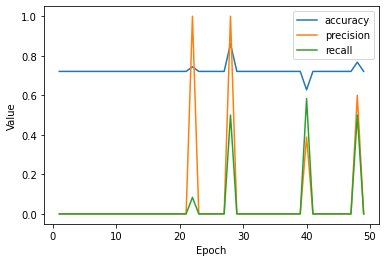

In [123]:
# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 50
batch_size = 100
classification_threshold = 0.52
label_name = "label"

# Here is the updated definition of METRICS:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(
          name='accuracy', threshold=classification_threshold),
      tf.keras.metrics.Precision(
          thresholds=classification_threshold, name='precision'),
      tf.keras.metrics.Recall(
          thresholds=classification_threshold, name="recall"),
]

# Establish the model's topography.
my_model = create_model(learning_rate, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, x_train, y_train, epochs, 
                          label_name, batch_size)

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['accuracy', "precision", "recall"] 
plot_curve(epochs, hist, list_of_metrics_to_plot)

In [127]:
validation_performance =  my_model.evaluate(x_val, y_val, verbose=0)
print(validation_performance)

[2.618487596511841, 1.0, 0.0, 0.0]
